In [37]:
from mykalshi import session, transport, formatting, market, events, trading, communications, exchange
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import os

sns.set_theme(style="darkgrid")
%config InlineBackend.figure_format = 'retina'

## 0.0 Preliminary and Brief Analysis

In [38]:
# markets_data = market.get_all_markets()
# markets_df = pd.json_normalize(markets_data)
# filename = 'all_markets_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.csv'
# markets_df.to_csv(filename, index=False)
files = glob.glob("all_markets_*.csv")
filename_to_load = max(files, key=os.path.getctime) if files else None

# Load if found
if filename_to_load:
    markets_df = pd.read_csv(filename_to_load)
    print(f"Loaded: {filename_to_load}")
    display(markets_df)
else:
    print("No matching CSV files found.")

C:\Users\nicco\AppData\Local\Temp\ipykernel_23456\3913729600.py:10: DtypeWarning: Columns (29,31,37,38,39,40,41,42,43,44,45,46,47,48,50,51,55,56,57,58,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  markets_df = pd.read_csv(filename_to_load)


Loaded: all_markets_2025-07-11-21-30-55.csv


ticker            event_ticker market_type  \
0        KXMLSGAME-25JUL16SJDAL-TIE  KXMLSGAME-25JUL16SJDAL      binary   
1         KXMLSGAME-25JUL16SJDAL-SJ  KXMLSGAME-25JUL16SJDAL      binary   
2        KXMLSGAME-25JUL16SJDAL-DAL  KXMLSGAME-25JUL16SJDAL      binary   
3        KXMLSGAME-25JUL16SDTOR-TOR  KXMLSGAME-25JUL16SDTOR      binary   
4        KXMLSGAME-25JUL16SDTOR-TIE  KXMLSGAME-25JUL16SDTOR      binary   
...                             ...                     ...         ...   
2140640              TEMP-21-T2.124                 TEMP-21      binary   
2140641             HOME-21JUN-T750              HOME-21JUN      binary   
2140642            GDP-21JUN30-T6.0             GDP-21JUN30      binary   
2140643          TRDDEFCN-21MAY-T30          TRDDEFCN-21MAY      binary   
2140644              CPI-21JUN-T0.6               CPI-21JUN      binary   

                                                     title subtitle  \
0                               San Jose vs Dallas Winner?      NaN   
1                               San Jose vs Dallas Winner?      NaN   
2                               San Jose vs Dallas Winner?      NaN   
3                          San Diego FC vs Toronto Winner?      NaN   
4                          San Diego FC vs Toronto Winner?      NaN   
...                                                    ...      ...   
2140640       Will 2021 be the **hottest year on record**?      NaN   
2140641         Will new U.S. home sales be above 750,000?    >750K   
2140642            Will real GDP increase by more than 6%?      >6%   
2140643  Will the US trade deficit in goods with China ...   >$30bn   
2140644  Will the Consumer Price Index (CPI) increase m...    >0.6%   

             yes_sub_title          no_sub_title             open_time  \
0                      Tie                   Tie  2025-07-12T00:05:00Z   
1                 San Jose              San Jose  2025-07-12T00:05:00Z   
2                   Dallas                Dallas  2025-07-12T00:05:00Z   
3                  Toronto               Toronto  2025-07-12T00:05:00Z   
4                      Tie                   Tie  2025-07-12T00:05:00Z   
...                    ...                   ...                   ...   
2140640     Above 2.124° C     2.124° C or below  2021-07-02T14:00:00Z   
2140641      Above 750,000      750,000 or below  2021-06-30T14:00:00Z   
2140642           Above 6%           6% or below  2021-06-30T14:00:00Z   
2140643  Above $30 billion  $30 billion or below  2021-06-30T14:00:00Z   
2140644         Above 0.6%         0.6% or below  2021-06-30T14:00:00Z   

                   close_time expected_expiration_time  ...  \
0        2027-07-17T02:30:00Z     2025-07-17T05:30:00Z  ...   
1        2027-07-17T02:30:00Z     2025-07-17T05:30:00Z  ...   
2        2027-07-17T02:30:00Z     2025-07-17T05:30:00Z  ...   
3        2027-07-17T02:30:00Z     2025-07-17T05:30:00Z  ...   
4        2027-07-17T02:30:00Z     2025-07-17T05:30:00Z  ...   
...                       ...                      ...  ...   
2140640  2022-01-10T00:00:00Z     2021-07-02T14:00:00Z  ...   
2140641  2021-07-25T23:00:00Z     2021-06-30T14:00:00Z  ...   
2140642  2021-07-28T23:00:00Z     2021-06-30T14:00:00Z  ...   
2140643  2021-07-01T23:00:00Z     2021-06-30T14:00:00Z  ...   
2140644  2021-07-12T23:00:00Z     2021-06-30T14:00:00Z  ...   

        custom_strike.Joins/Leaves custom_strike.President  \
0                              NaN                     NaN   
1                              NaN                     NaN   
2                              NaN                     NaN   
3                              NaN                     NaN   
4                              NaN                     NaN   
...                            ...                     ...   
2140640                        NaN                     NaN   
2140641                        NaN                     NaN   
2140642                        NaN                     NaN   
2140643  

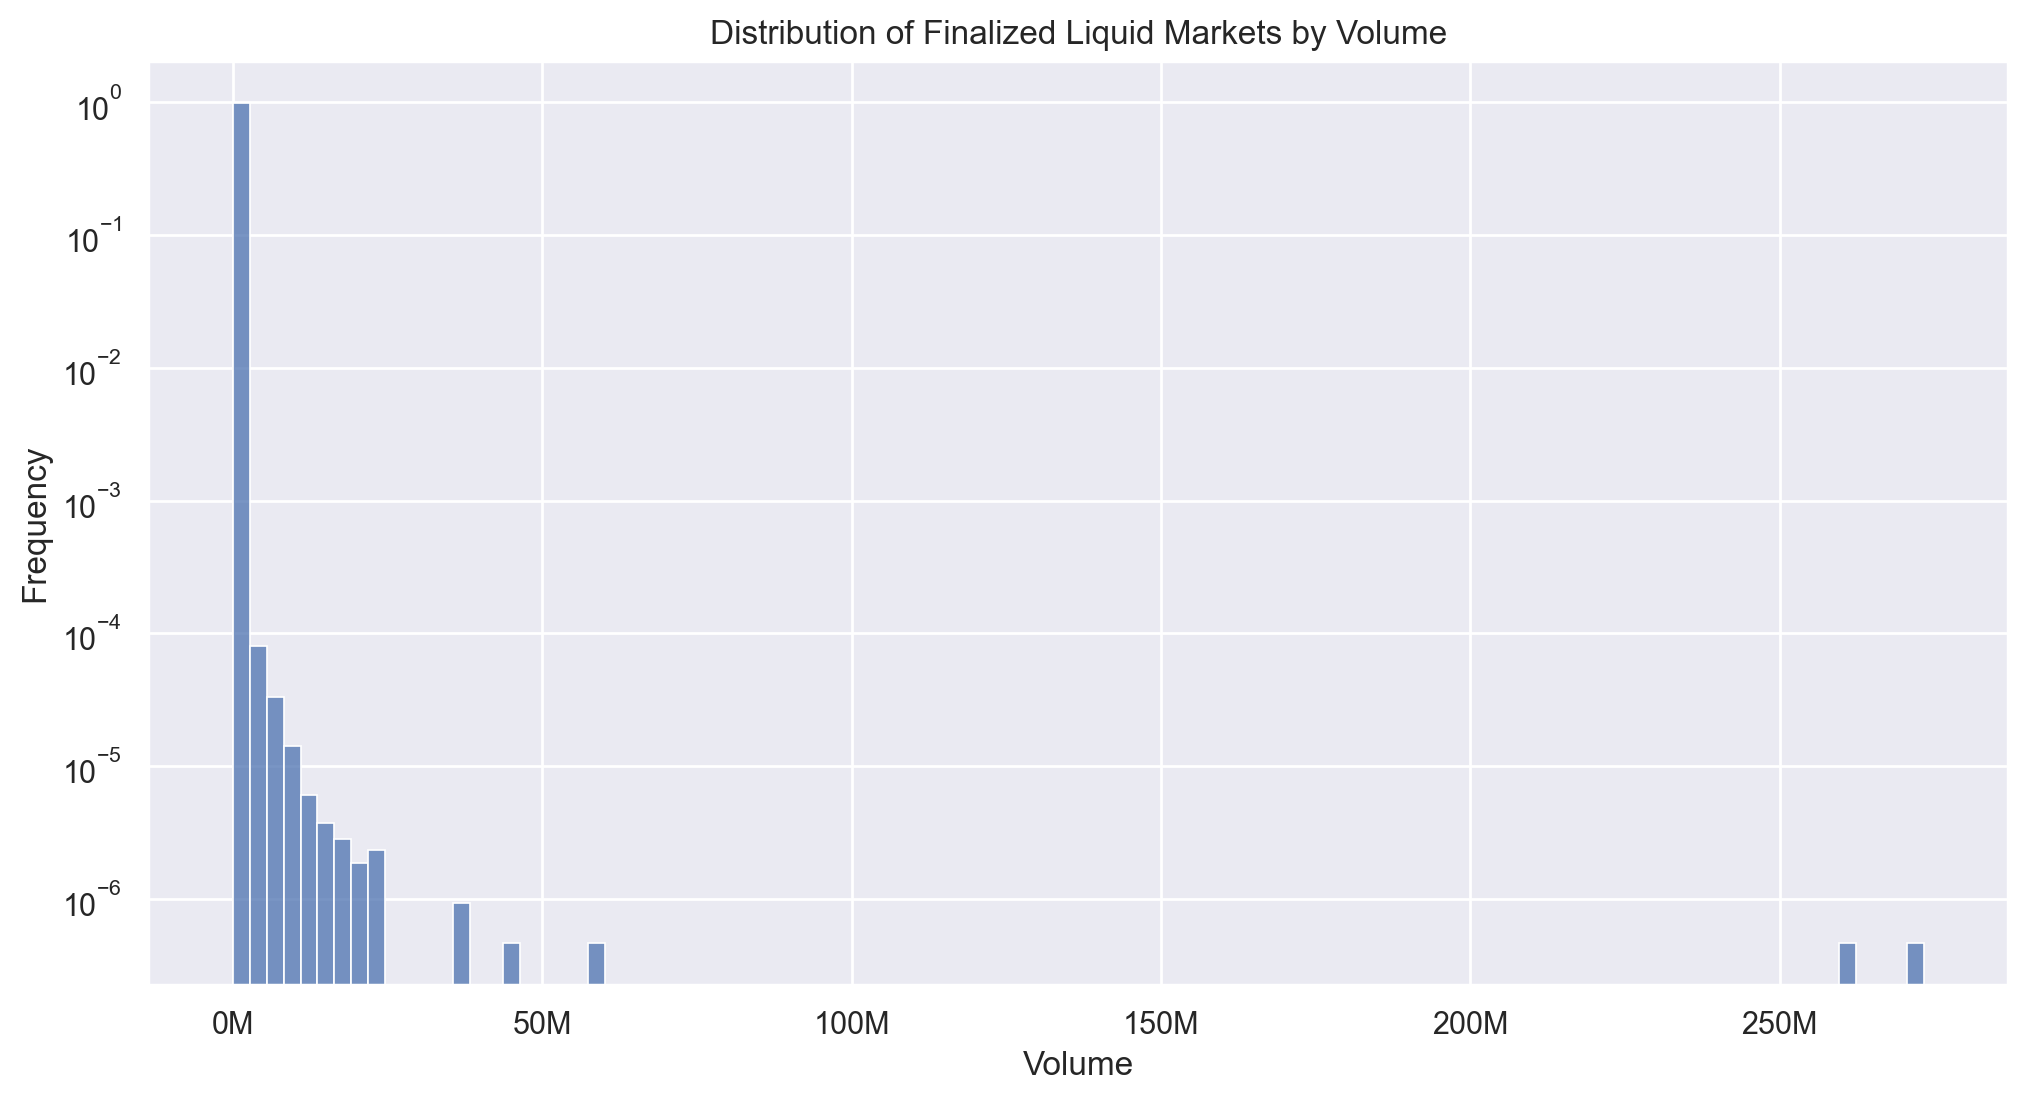

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(data=markets_df, x='volume', bins=100, kde=False, stat='proportion')
plt.title('Distribution of Finalized Liquid Markets by Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.show()

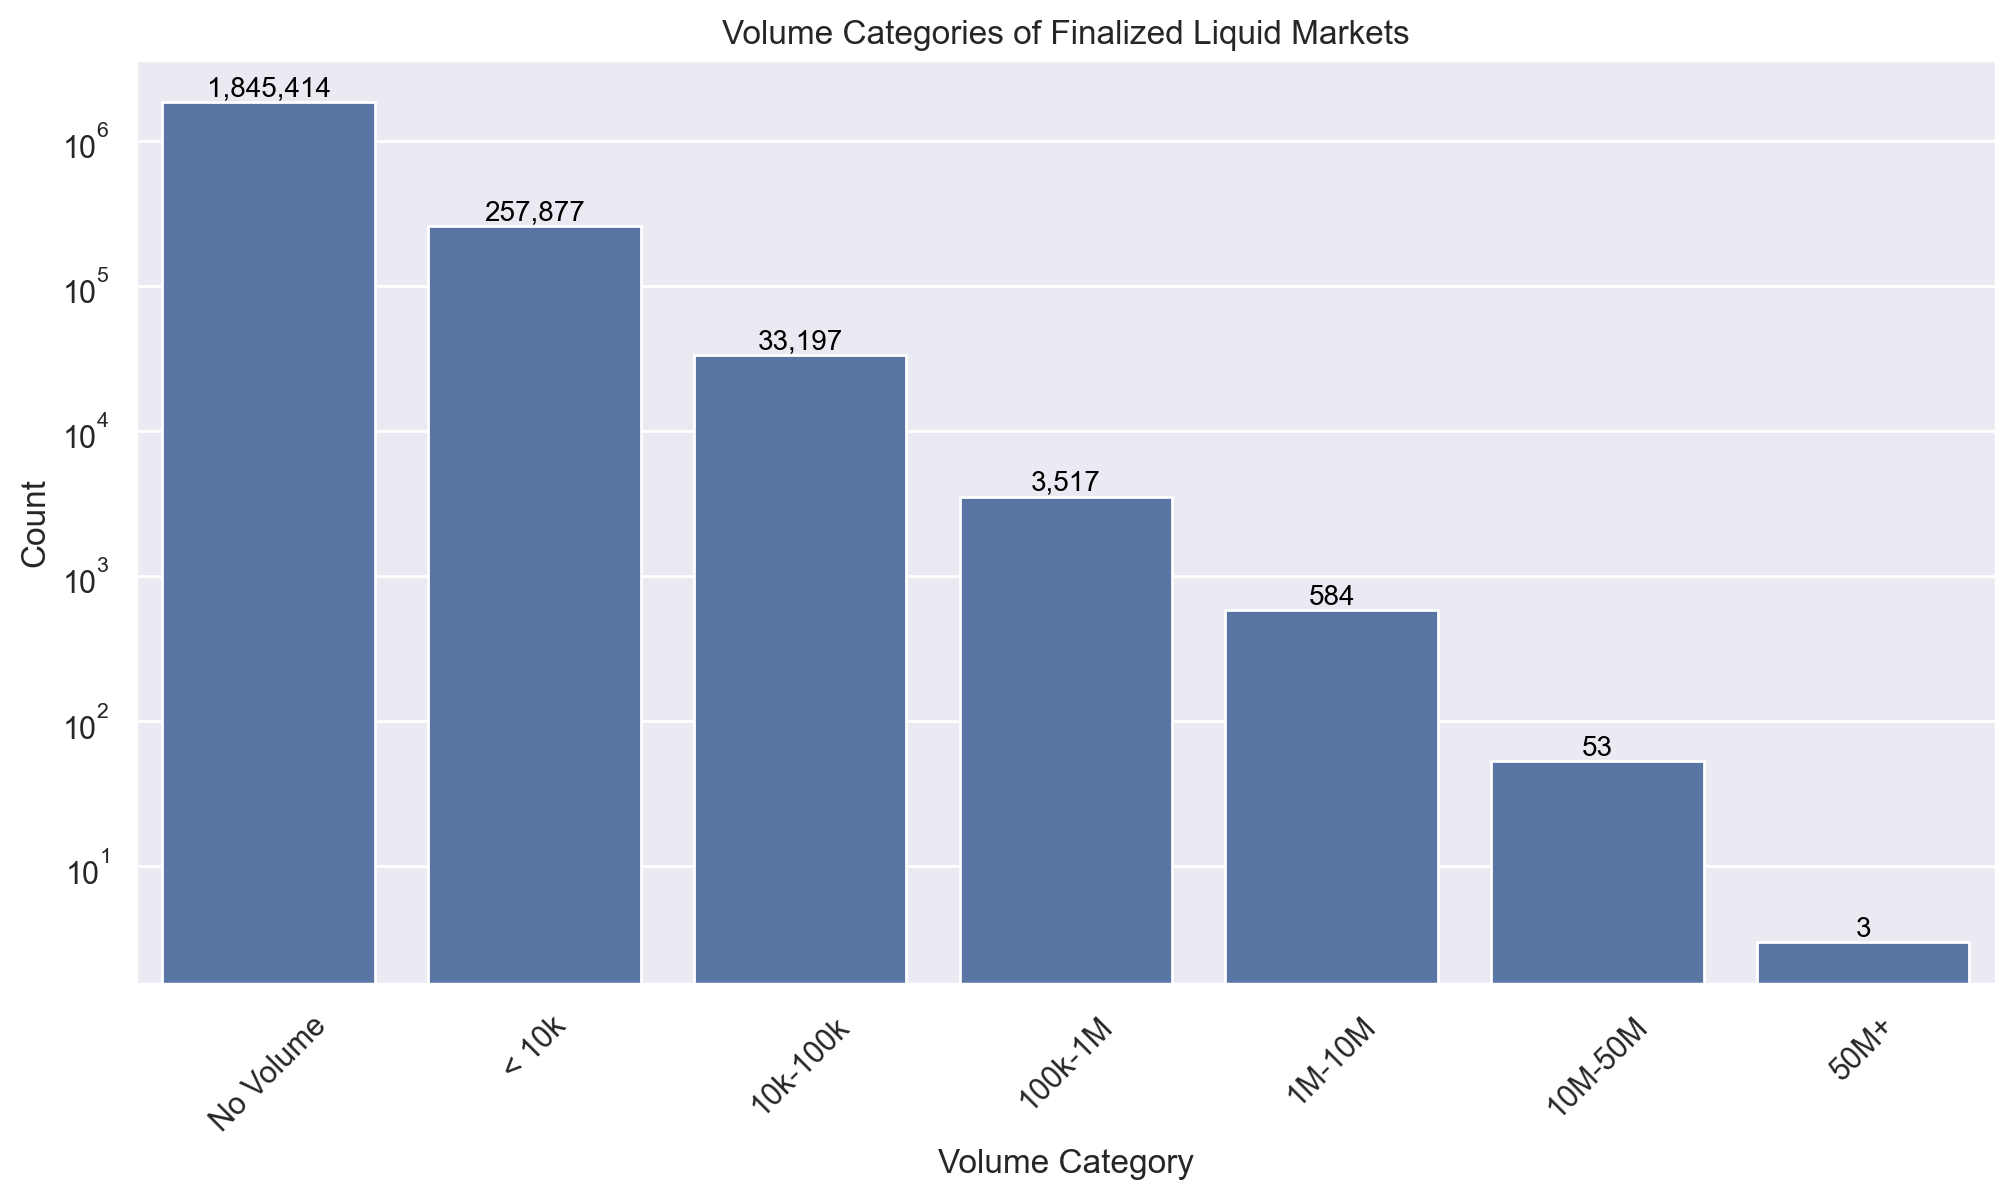

In [40]:
bins = [[0, 0.1], [0.1, 10000], [10000, 100000], [100000, 1000000], [1000000, 10000000], [10000000, 50000000], [50000000, 100000000000]]
bins_labels = ["No Volume", "< 10k", "10k-100k", "100k-1M", "1M-10M", "10M-50M", "50M+"]

def categorize_volume(volume):
    for i, (low, high) in enumerate(bins):
        if low <= volume < high:
            return f"{low}-{high}"
    return "Other"

markets_df['volume_category'] = markets_df['volume'].apply(categorize_volume)
plt.figure(figsize=(12, 6)) 
sns.countplot(data=markets_df, x='volume_category', order=sorted(markets_df['volume_category'].unique()))
# Override the x-tick labels to show ranges
plt.xticks(ticks=range(len(bins_labels)), labels=bins_labels, rotation=45)
# Add printed number on top of each bar (and formate them clearly with "," thousands separator)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', rotation=0)
plt.title('Volume Categories of Finalized Liquid Markets')
plt.xlabel('Volume Category')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [41]:
fin_liquid_markets = markets_df[(markets_df['status'] == "finalized") & (markets_df['volume'] > 500000)]
fin_liquid_markets = fin_liquid_markets.reset_index(drop=True)
# fin_liquid_markets.to_csv("FinalizedLiquidMarkets.csv", index=False)
fin_liquid_markets

ticker              event_ticker market_type  \
0    KXATPMATCH-25JUL11SINDJO-DJO  KXATPMATCH-25JUL11SINDJO      binary   
1    KXATPMATCH-25JUL11SINDJO-SIN  KXATPMATCH-25JUL11SINDJO      binary   
2    KXWTAMATCH-25JUL10BENSWI-SWI  KXWTAMATCH-25JUL10BENSWI      binary   
3    KXWTAMATCH-25JUL10BENSWI-BEN  KXWTAMATCH-25JUL10BENSWI      binary   
4    KXATPMATCH-25JUL11FRIALC-FRI  KXATPMATCH-25JUL11FRIALC      binary   
..                            ...                       ...         ...   
960               FED-23MAY-T5.00                 FED-23MAY      binary   
961               FED-23MAR-T5.00                 FED-23MAR      binary   
962               FED-23MAR-T4.75                 FED-23MAR      binary   
963               FED-22SEP-T3.00                 FED-22SEP      binary   
964                   RECSS-22JUL               RECSS-22JUL      binary   

                                                 title  \
0    Will Novak Djokovic be a winner of the semifin...   
1    Will Jannik Sinner be a winner of the semifina...   
2    Will Iga Swiatek be a winner of the semifinal ...   
3    Will Belinda Bencic be a winner of the semifin...   
4    Will Taylor Fritz be a winner of the semifinal...   
..                                                 ...   
960  Will the upper bound of the federal funds rate...   
961  Will the upper bound of the federal funds rate...   
962  Will the upper bound of the federal funds rate...   
963  Will the federal funds rate be above 3.00% fol...   
964             Will a **recession** start by Q2 2022?   

                           subtitle                      yes_sub_title  \
0                               NaN                     Novak Djokovic   
1                               NaN                      Jannik Sinner   
2                               NaN                        Iga Swiatek   
3                               NaN                     Belinda Bencic   
4                               NaN                       Taylor Fritz   
..                              ...                                ...   
960           >5.00% :: 25+ bp hike                        Above 5.00%   
961           >5.00% :: 50+ bp hike                        Above 5.00%   
962           >4.75% :: 25+ bp hike                        Above 4.75%   
963  >3.00% :: 75bp hike or greater                        Above 3.00%   
964                             NaN  At least one negative GDP quarter   

                                 no_sub_title             open_time  \
0                              Novak Djokovic  2025-07-09T18:45:00Z   
1                               Jannik Sinner  2025-07-09T18:45:00Z   
2                                 Iga Swiatek  2025-07-09T15:05:00Z   
3                              Belinda Bencic  2025-07-09T15:05:00Z   
4                                Taylor Fritz  2025-07-08T18:05:00Z   
..                                        ...                   ...   
960                            5.00% or below  2022-11-02T15:15:00Z   
961                            5.00% or below  2022-10-17T14:00:00Z   
962                            4.75% or below  2022-10-17T14:00:00Z   
963                            3.00% or below  2022-06-14T15:15:00Z   
964  All quarters with at least 0% GDP growth  2021-08-06T15:30:00Z   

                      close_time expected_expiration_time  ...  \
0    2025-07-11T18:00:53.109089Z     2025-07-11T15:30:00Z  ...   
1    2025-07-11T18:00:53.109089Z     2025-07-11T15:30:00Z  ...   
2    2025-07-10T17:15:19.053047Z     2025-07-10T15:30:00Z  ...   
3    2025-07-10T17:15:19.053047Z     2025-07-10T15:30:00Z  ...   
4    2025-07-11T15:30:29.544767Z     2025-07-11T15:30:00Z  ...   
..                           ...                      ...  ...   
960         2023-05-03T17:55:00Z     2023-05-03T14:00:00Z  ...   
961         2023-03-22T17:55:00Z     2023-03-22T14:00:00Z  ...   
962         2023-03-22T17:55:00Z     2023-03-22T14:00:00Z  ...   
963         2022-09-21T17:5

In [42]:
open_mkts = pd.json_normalize(market.get_all_markets(status="open", batch_size=100))
open_mkts

ticker               event_ticker  \
0                      KXSPOTIFYD-25JUL24-CRA         KXSPOTIFYD-25JUL24   
1                     KXSPOTIFY2D-25JUL24-CRA        KXSPOTIFY2D-25JUL24   
2      KXLOCATIONOPENERICEMANUEL-26-JAN01-UNI  KXLOCATIONOPENERICEMANUEL   
3      KXLOCATIONOPENERICEMANUEL-26-JAN01-TEX  KXLOCATIONOPENERICEMANUEL   
4      KXLOCATIONOPENERICEMANUEL-26-JAN01-SWI  KXLOCATIONOPENERICEMANUEL   
...                                       ...                        ...   
14132                           MSFTCEO-25-SG                 MSFTCEO-25   
14133                           MSFTCEO-25-SA                 MSFTCEO-25   
14134                           MSFTCEO-25-BS                 MSFTCEO-25   
14135                       APPLEPORT-25DEC31          APPLEPORT-25DEC31   
14136                       AMAZONFTC-29DEC31          AMAZONFTC-29DEC31   

      market_type                                              title  \
0          binary           Top USA Song on Spotify on Jul 24, 2025?   
1          binary  Will the top Song on Jul 24, 2025 be Crazy Train?   
2          binary       Where will Tesla diner's open to the public?   
3          binary       Where will Tesla diner's open to the public?   
4          binary       Where will Tesla diner's open to the public?   
...           ...                                                ...   
14132      binary      Will Scott Guthrie be the next Microsoft CEO?   
14133      binary         Will Sam Altman be the next Microsoft CEO?   
14134      binary         Will Brad Smith be the next Microsoft CEO?   
14135      binary  Will Apple announce a portless phone by Dec 31...   
14136      binary  Will a court find that Amazon has illegally ma...   

               subtitle    yes_sub_title       no_sub_title  \
0      :: Ozzy Osbourne      Crazy Train        Crazy Train   
1      :: Ozzy Osbourne      Crazy Train        Crazy Train   
2                         United Kingdom     United Kingdom   
3                                  Texas              Texas   
4                            Switzerland        Switzerland   
...                 ...              ...                ...   
14132     Scott Guthrie    Scott Guthrie  Not Scott Guthrie   
14133        Sam Altman       Sam Altman     Not Sam Altman   
14134        Brad Smith       Brad Smith     Not Brad Smith   
14135    By Dec 31 2025          Reveals     Doesn't reveal   
14136                    Government wins        Amazon wins   

                  open_time            close_time expected_expiration_time  \
0      2025-07-24T16:30:34Z  2025-07-25T03:59:00Z     2025-08-07T14:00:00Z   
1      2025-07-24T16:30:27Z  2025-07-25T03:59:00Z     2025-07-25T14:00:00Z   
2      2025-07-24T16:30:00Z  2026-01-01T04:59:00Z     2026-01-01T15:00:00Z   
3      2025-07-24T16:30:00Z  2026-01-01T04:59:00Z     2026-01-01T15:00:00Z   
4      2025-07-24T16:30:00Z  2026-01-01T04:59:00Z     2026-01-01T15:00:00Z   
...                     ...                   ...                      ...   
14132  2023-11-29T01:16:00Z  2026-01-01T04:59:00Z     2026-01-01T15:00:00Z   
14133  2023-11-29T01:16:00Z  2026-01-01T04:59:00Z     2026-01-01T15:00:00Z   
14134  2023-11-29T01:16:00Z  2026-01-01T04:59:00Z     2026-01-01T15:00:00Z   
14135  2023-10-25T14:00:00Z  2026-01-01T04:59:00Z     2025-12-31T15:00:00Z   
14136  2023-10-23T21:00:00Z  2030-01-01T18:58:00Z     2030-01-01T09:04:00Z   

       ... custom_strike.House Winner custom_strike.President Winner  \
0      ...                        NaN                            NaN   
1      ...                        NaN                            NaN   
2      ...                        NaN                            NaN   
3      ...                        NaN                            NaN   
4      ...                        NaN                            NaN   
...    ...                        ...                            ...   
14132  ...                        NaN                          

## 1.0 Presidential Election

In [43]:
out = events.event_info("PRES-2024")
out["markets"]#, out["event_info"]

market_ticker          yes_sub_title  \
0   PRES-2024-KH          Kamala Harris   
1  PRES-2024-DJT           Donald Trump   
2  PRES-2024-RFK  Robert F. Kennedy Jr.   
3   PRES-2024-JS             Jill Stein   
4   PRES-2024-CO           Chase Oliver   
5   PRES-2024-CW            Cornel West   

                                   range strike_type  last_price  yes_bid  \
0                 :: or another Democrat      custom           1        0   
1               :: or another Republican        None          99       99   
2    :: or another We the People nominee      custom           1        0   
3      :: or another Green Party nominee      custom           1        0   
4              :: or another Libertarian      custom           1        0   
5  :: or another Justice for All nominee      custom           1        0   

   yes_ask  no_bid  no_ask     volume             open_time  \
0        1      99     100  273312857  2024-10-04T12:15:00Z   
1      100       0       1  262334207  2024-10-04T12:15:00Z   
2        1      99     100     224361  2024-10-04T12:15:00Z   
3        1      99     100      40394  2024-10-04T12:15:00Z   
4        1      99     100      20834  2024-10-04T12:15:00Z   
5        1      99     100      16290  2024-10-04T12:15:00Z   

                    close_time     status  \
0  2025-01-20T17:03:48.078202Z  finalized   
1  2025-01-20T17:03:48.078202Z  finalized   
2  2025-01-20T17:03:48.078202Z  finalized   
3  2025-01-20T17:03:48.078202Z  finalized   
4  2025-01-20T17:03:48.078202Z  finalized   
5  2025-01-20T17:03:48.078202Z  finalized   

                                       rules_primary  
0  If Kamala Harris or another representative of ...  
1  If Donald Trump or another representative of t...  
2  If Robert F. Kennedy Jr. or another representa...  
3  If Jill Stein or another representative of the...  
4  If Chase Oliver or another representative of t...  
5  If Cornel West or another representative of th...

In [44]:
results = {}

for mkt in out["markets"]["market_ticker"].values:
    cs_df = market.candlesticks_to_df(market.get_full_market(series_ticker="KXLLM1", ticker=mkt, period_interval='h', end_ts='11/10/2024'))[['end_period', 'yes_ask_close', 'yes_bid_close', 'volume']]
    
    cs_df['end_period'] = pd.to_datetime(cs_df['end_period'])
    cs_df['date'] = cs_df['end_period']
    cs_df['midval'] = (cs_df['yes_ask_close'] + cs_df['yes_bid_close']) / 2
    cs_df['ask'] = cs_df['yes_ask_close']
    cs_df['bid'] = cs_df['yes_bid_close']
    cs_df = cs_df.drop(columns=['yes_ask_close', 'yes_bid_close', 'end_period'])
    cs_df.set_index('date', inplace=True)
    title = out["markets"].loc[out["markets"]["market_ticker"] == mkt, "yes_sub_title"].values[0]
    # range = parse_range_string(range)

    results[title] = cs_df

# Step 1: Compute the global index (union of all datetime indices)
all_indices = sorted(set().union(*[df.index for df in results.values()]))
global_index = pd.DatetimeIndex(all_indices)

# Step 2: Build the full DataFrame with aligned index
results_df = pd.DataFrame(index=global_index)

# Step 3: Merge all time series, aligned on the global index
for title, df in results.items():
    df = df.groupby(df.index).mean()  # or .sum(), or use .duplicated() line

    renamed_df = df.rename(columns={
        'midval': f'{title}_midval',
        'ask': f'{title}_ask',
        'bid': f'{title}_bid',
        'volume': f'{title}_volume'
    })

    renamed_df = renamed_df.reindex(global_index)
    results_df = pd.concat([results_df, renamed_df], axis=1)

# results_df.ffill(inplace=True)
for col in results_df.columns:
    if '_midval' in col:
        vol_col = col.replace('_midval', '_volume')
        filled_series = results_df[col].copy()
        volume_series = results_df[vol_col]

        for i in range(1, len(filled_series)):
            if pd.isna(filled_series.iloc[i]) and pd.notna(volume_series.iloc[i-1]) and volume_series.iloc[i-1] > 200:
                filled_series.iloc[i] = filled_series.iloc[i - 1]

        results_df[col] = filled_series

# Step 4: Final computed columns
results_df['Vol'] = results_df[[col for col in results_df.columns if '_volume' in col]].sum(axis=1)
results_df['Tot'] = results_df[[col for col in results_df.columns if '_midval' in col]].sum(axis=1)

results_df.index.name = 'date'
results_df


Kamala Harris_volume  Kamala Harris_midval  \
date                                                              
2024-10-04 13:00:00               24083.0                  50.5   
2024-10-04 14:00:00                4330.0                  50.5   
2024-10-04 15:00:00                6199.0                  50.5   
2024-10-04 16:00:00                2814.0                  50.5   
2024-10-04 17:00:00                8601.0                  50.5   
...                                   ...                   ...   
2024-11-09 20:00:00               21514.0                   1.5   
2024-11-09 21:00:00               56499.0                   1.5   
2024-11-09 22:00:00               94528.0                   1.5   
2024-11-09 23:00:00               33784.0                   1.5   
2024-11-10 00:00:00               61869.0                   1.5   

                     Kamala Harris_ask  Kamala Harris_bid  \
date                                                        
2024-10-04 13:00:00               51.0               50.0   
2024-10-04 14:00:00               51.0               50.0   
2024-10-04 15:00:00               51.0               50.0   
2024-10-04 16:00:00               51.0               50.0   
2024-10-04 17:00:00               51.0               50.0   
...                                ...                ...   
2024-11-09 20:00:00                2.0                1.0   
2024-11-09 21:00:00                2.0                1.0   
2024-11-09 22:00:00                2.0                1.0   
2024-11-09 23:00:00                2.0                1.0   
2024-11-10 00:00:00                2.0                1.0   

                     Donald Trump_volume  Donald Trump_midval  \
date                                                            
2024-10-04 13:00:00              39835.0                 49.5   
2024-10-04 14:00:00               3390.0                 49.5   
2024-10-04 15:00:00               3382.0                 49.5   
2024-10-04 16:00:00               3804.0                 49.5   
2024-10-04 17:00:00              21784.0                 49.5   
...                                  ...                  ...   
2024-11-09 20:00:00              54705.0                 97.5   
2024-11-09 21:00:00              77001.0                 97.5   
2024-11-09 22:00:00              41228.0                 97.5   
2024-11-09 23:00:00              58755.0                 97.5   
2024-11-10 00:00:00              34128.0                 97.5   

                     Donald Trump_ask  Donald Trump_bid  \
date                                                      
2024-10-04 13:00:00              50.0              49.0   
2024-10-04 14:00:00              50.0              49.0   
2024-10-04 15:00:00              50.0              49.0   
2024-10-04 16:00:00              50.0              49.0   
2024-10-04 17:00:00              50.0              49.0   
...                               ...               ...   
2024-11-09 20:00:00              98.0              97.0   
2024-11-09 21:00:00              98.0              97.0   
2024-11-09 22:00:00              98.0              97.0   
2024-11-09 23:00:00              98.0              97.0   
2024-11-10 00:00:00              98.0              97.0   

                     Robert F. Kennedy Jr._volume  \
date                                                
2024-10-04 13:00:00                           NaN   
2024-10-04 14:00:00                           NaN   
2024-10-04 15:00:00                           NaN   
2024-10-04 16:00:00                           NaN   
2024-10-04 17:00:00                           NaN   
...                                           ...   
2024-11-09 20:00:00                           NaN   
2024-11-09 21:00:00                           NaN   
2024-11-09 22:00:00                           NaN   
2024-11-09 23:00:00                           NaN   
2024-11-10 00:00:00                           NaN   

                     Robert F. Kennedy Jr._midval  

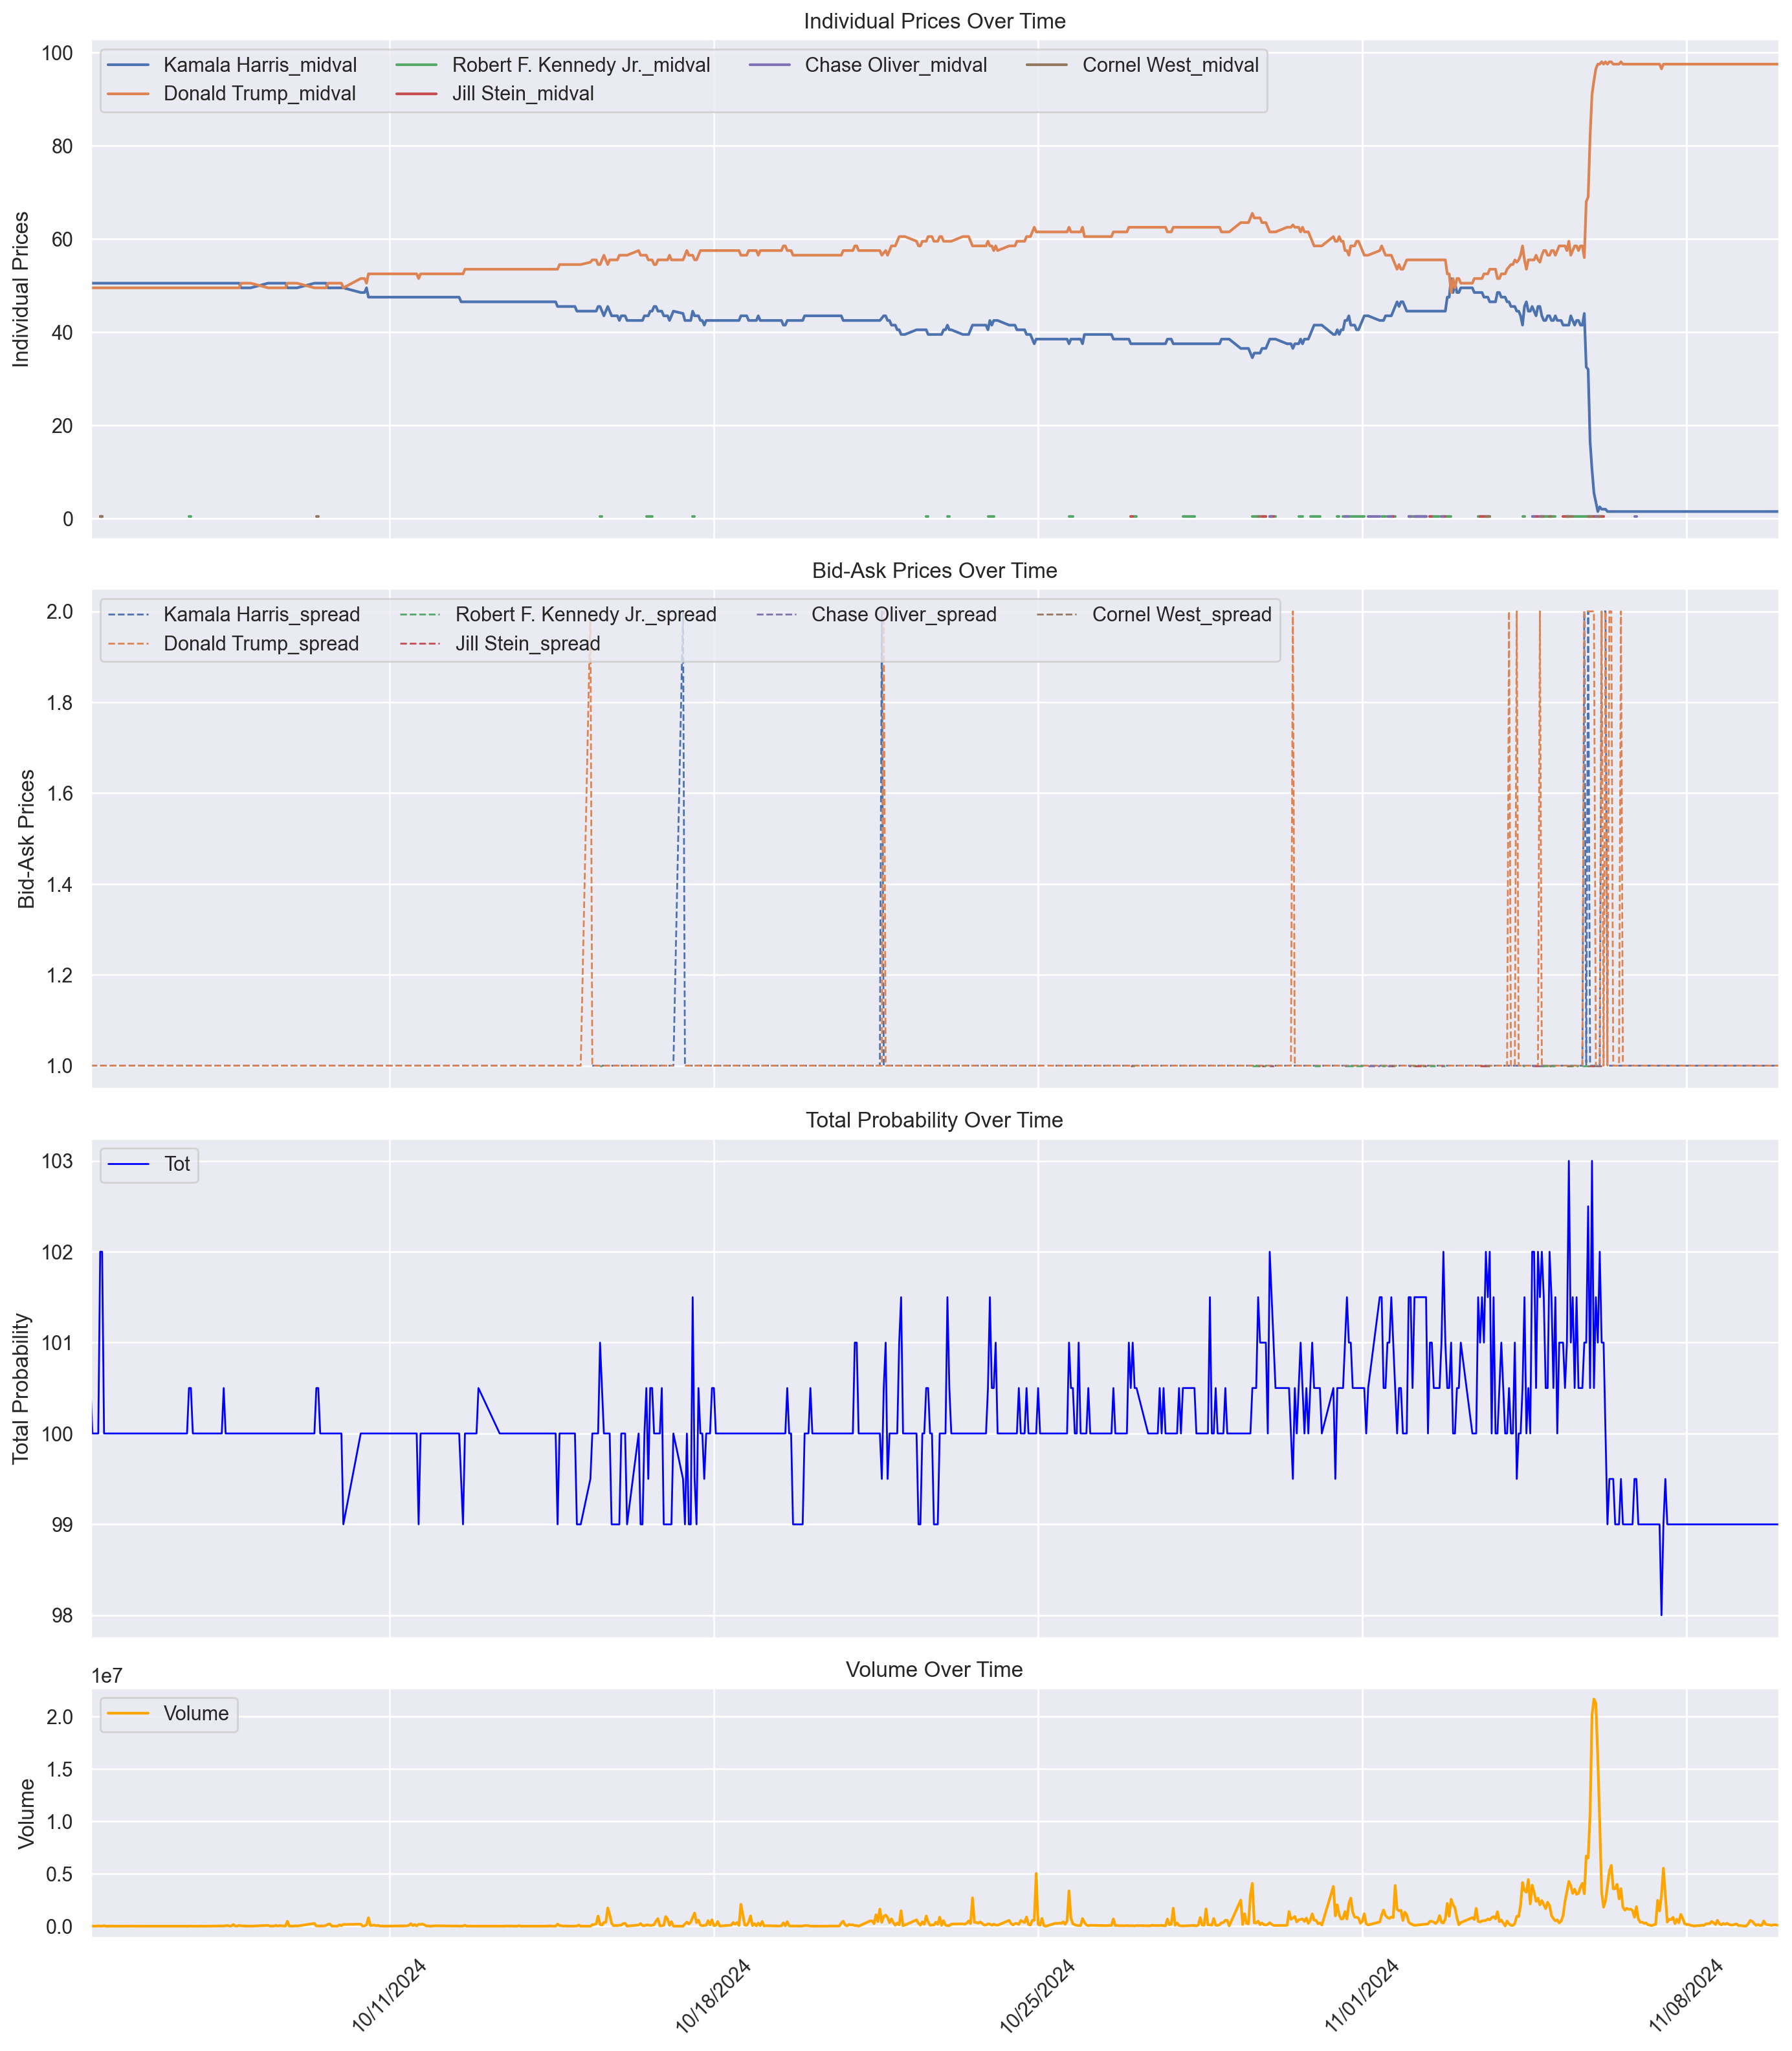

In [45]:
plot_df = results_df.reset_index()

# Identify price columns (all columns except 'date', 'Tot', and 'Vol')
price_columns = [col for col in plot_df.columns if "_midval" in col]

# Create a figure with 3 subplots, making the top two price plots the same size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(14, 16), 
                                    gridspec_kw={'height_ratios': [2, 2, 2, 1]}, 
                                    sharex=True)

# Plot 1: Individual Prices
for col in price_columns:
    ax1.plot(plot_df['date'], plot_df[col], linewidth=1.5, label=col)
ax1.set_ylabel('Individual Prices')
ax1.set_title('Individual Prices Over Time')
ax1.legend(loc='upper left', ncol=min(4, len(price_columns)))
ax1.grid(True)
plt.setp(ax1.get_xticklabels(), visible=False)

# Plot 2: Bid-Ask Prices
for col in price_columns:
    ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_ask')] - plot_df[col.replace('_midval', '_bid')], linestyle='--', linewidth=1, label=col.replace('_midval', '_spread'))
    # ax2.plot(plot_df['date'], plot_df[col.replace('_midval', '_bid')], linestyle=':', linewidth=1, label=col.replace('_midval', '_bid'))
ax2.set_ylabel('Bid-Ask Prices')
ax2.set_title('Bid-Ask Prices Over Time')
ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
ax2.grid(True)
plt.setp(ax2.get_xticklabels(), visible=False)

# selected_outcome = 'Donald Trump'

# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_ask'], linestyle='--', linewidth=1, label=selected_outcome + '_ask')
# ax2.plot(plot_df['date'], plot_df[selected_outcome + '_bid'], linestyle=':', linewidth=1, label=selected_outcome + '_bid')
# ax2.set_ylabel('Bid-Ask Prices')
# ax2.set_title('Bid-Ask Prices Over Time')
# ax2.legend(loc='upper left', ncol=min(4, len(price_columns) * 2))
# ax2.grid(True)
# plt.setp(ax2.get_xticklabels(), visible=False)

# Plot 3: Total Probability
ax3.plot(plot_df['date'], plot_df['Tot'], color='blue', linewidth=1, label='Tot')
ax3.set_ylabel('Total Probability')
ax3.set_title('Total Probability Over Time')
ax3.legend(loc='upper left')
ax3.grid(True)
plt.setp(ax3.get_xticklabels(), visible=False)

# Calculate appropriate width for bars
if plot_df.shape[0] > 1:
    time_diff = (plot_df['date'].iloc[1] - plot_df['date'].iloc[0]).total_seconds()
    width_in_days = (time_diff / (24 * 60 * 60)) * 0.8
else:
    width_in_days = 0.01

# Plot 4: Volume
ax4.plot(plot_df['date'], plot_df['Vol'], color='orange', label='Volume')
ax4.set_ylabel('Volume')
ax4.set_title('Volume Over Time')
ax4.legend(loc='upper left')
ax4.grid(True)

# Format only the bottom x-axis with more compact labels
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

# Adjust the x-axis limits to match your data range
date_min = plot_df['date'].min()
date_max = plot_df['date'].max()
ax4.set_xlim(date_min, date_max)

plt.tight_layout()
plt.show()

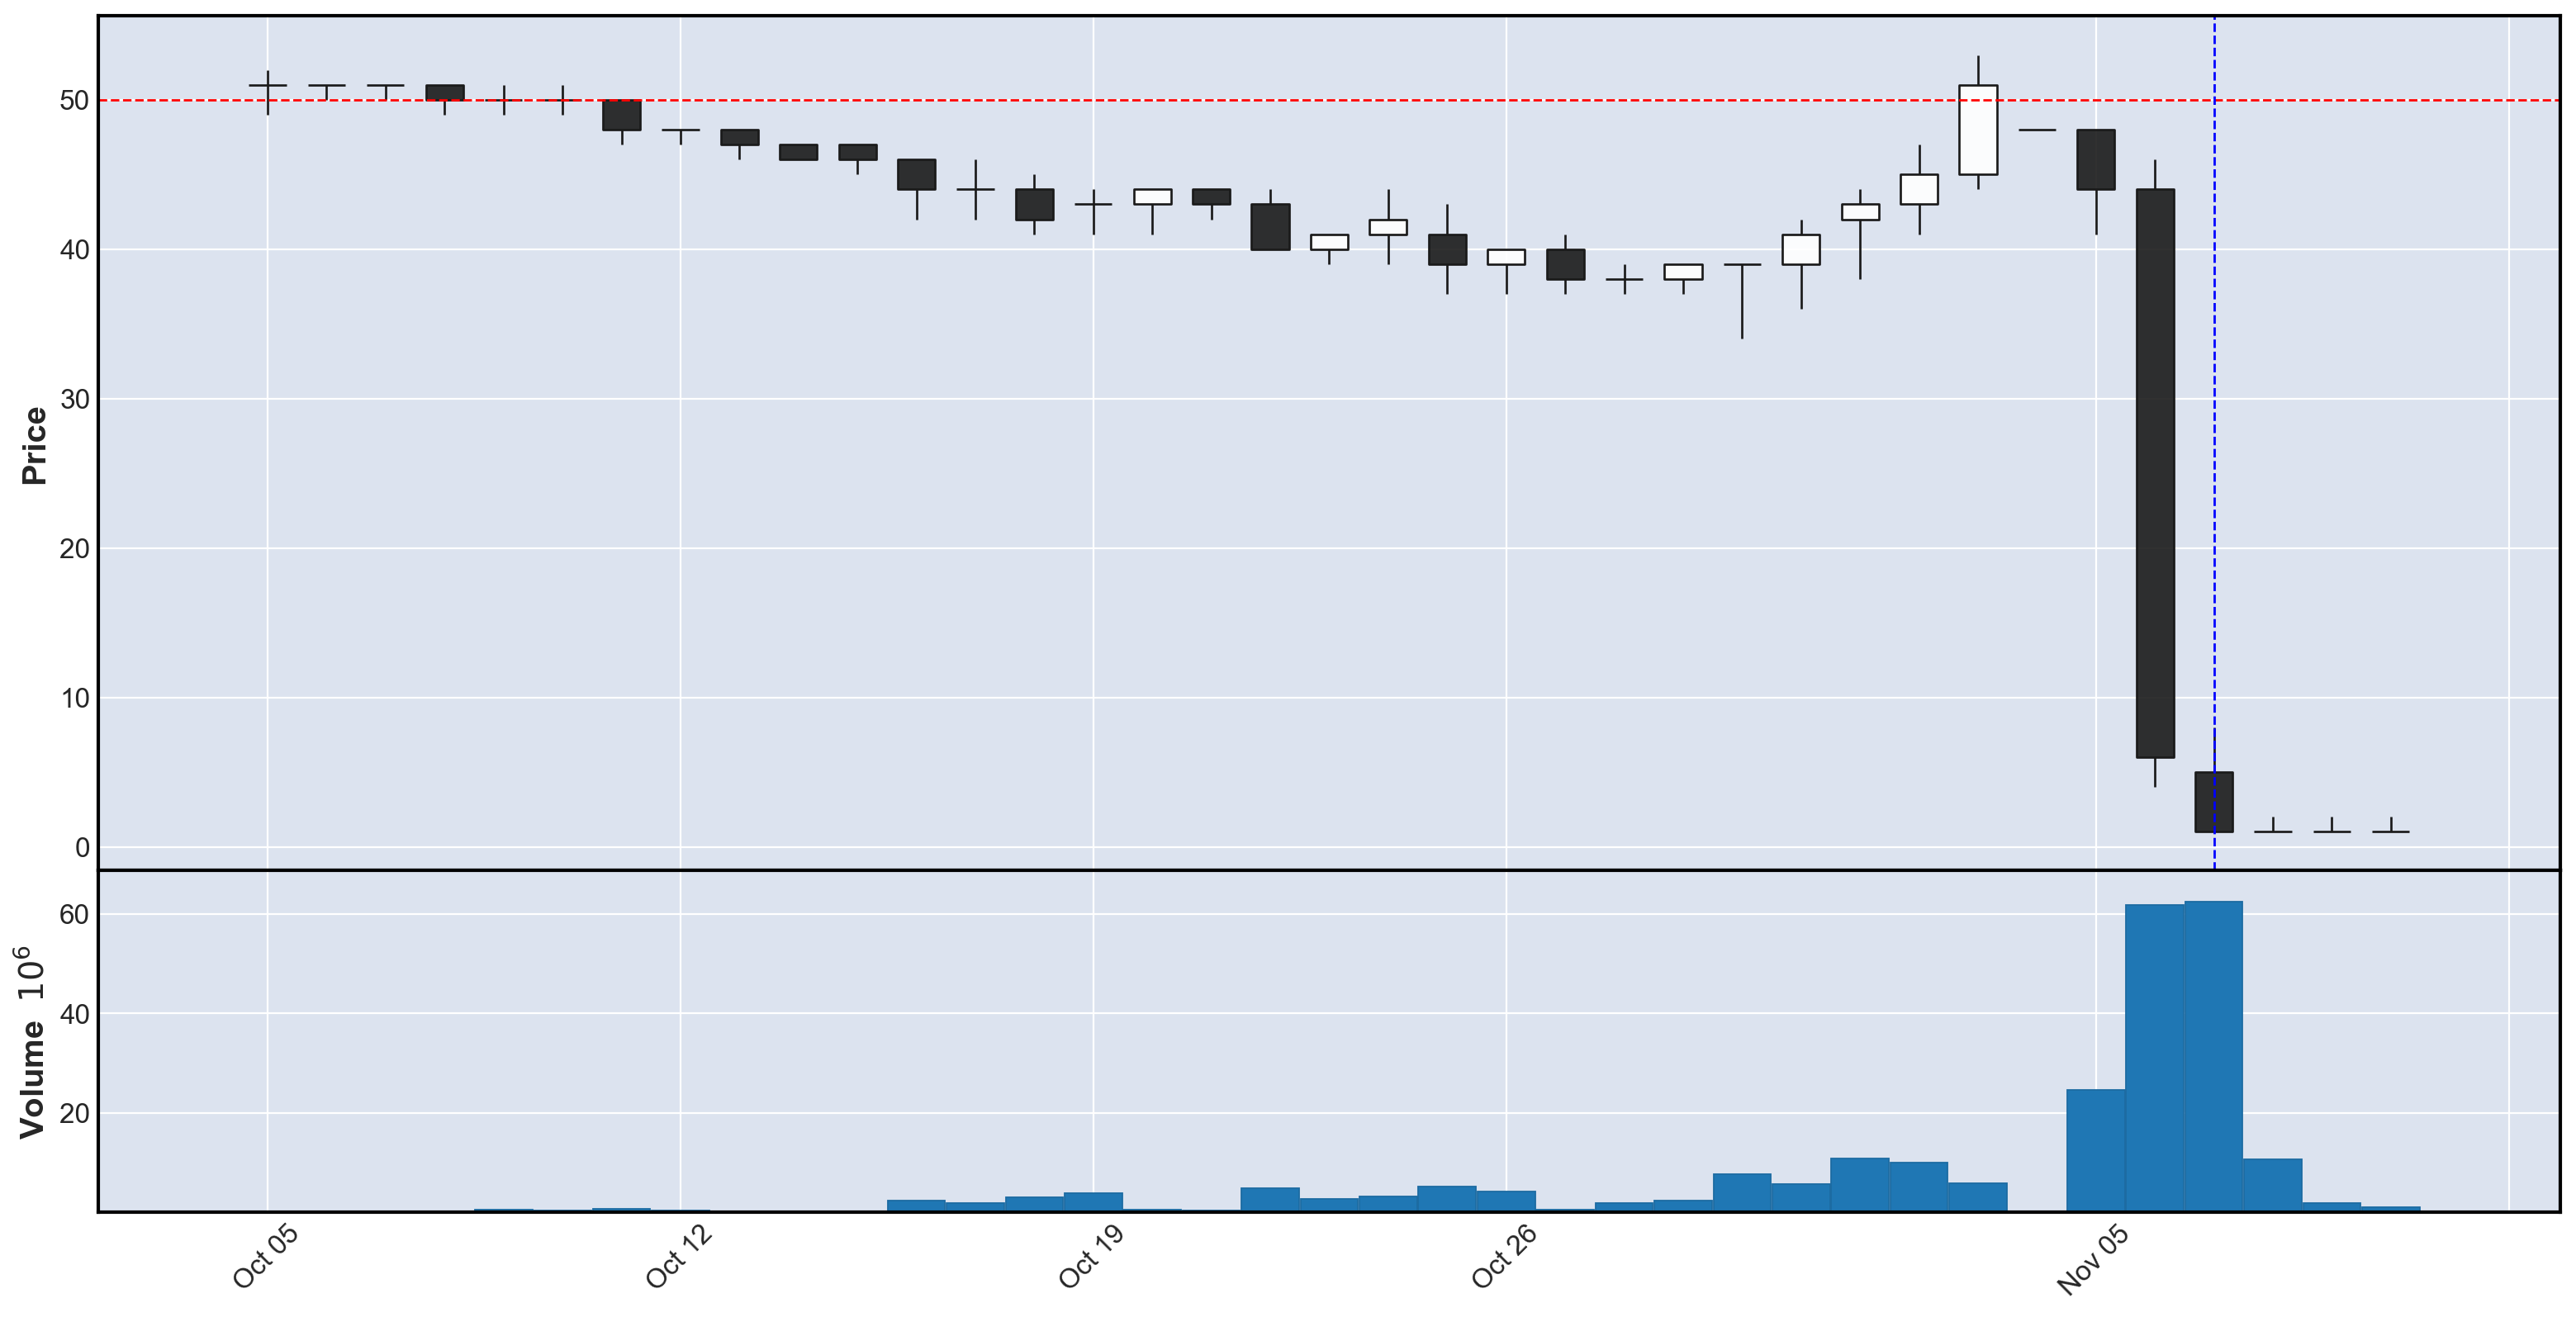

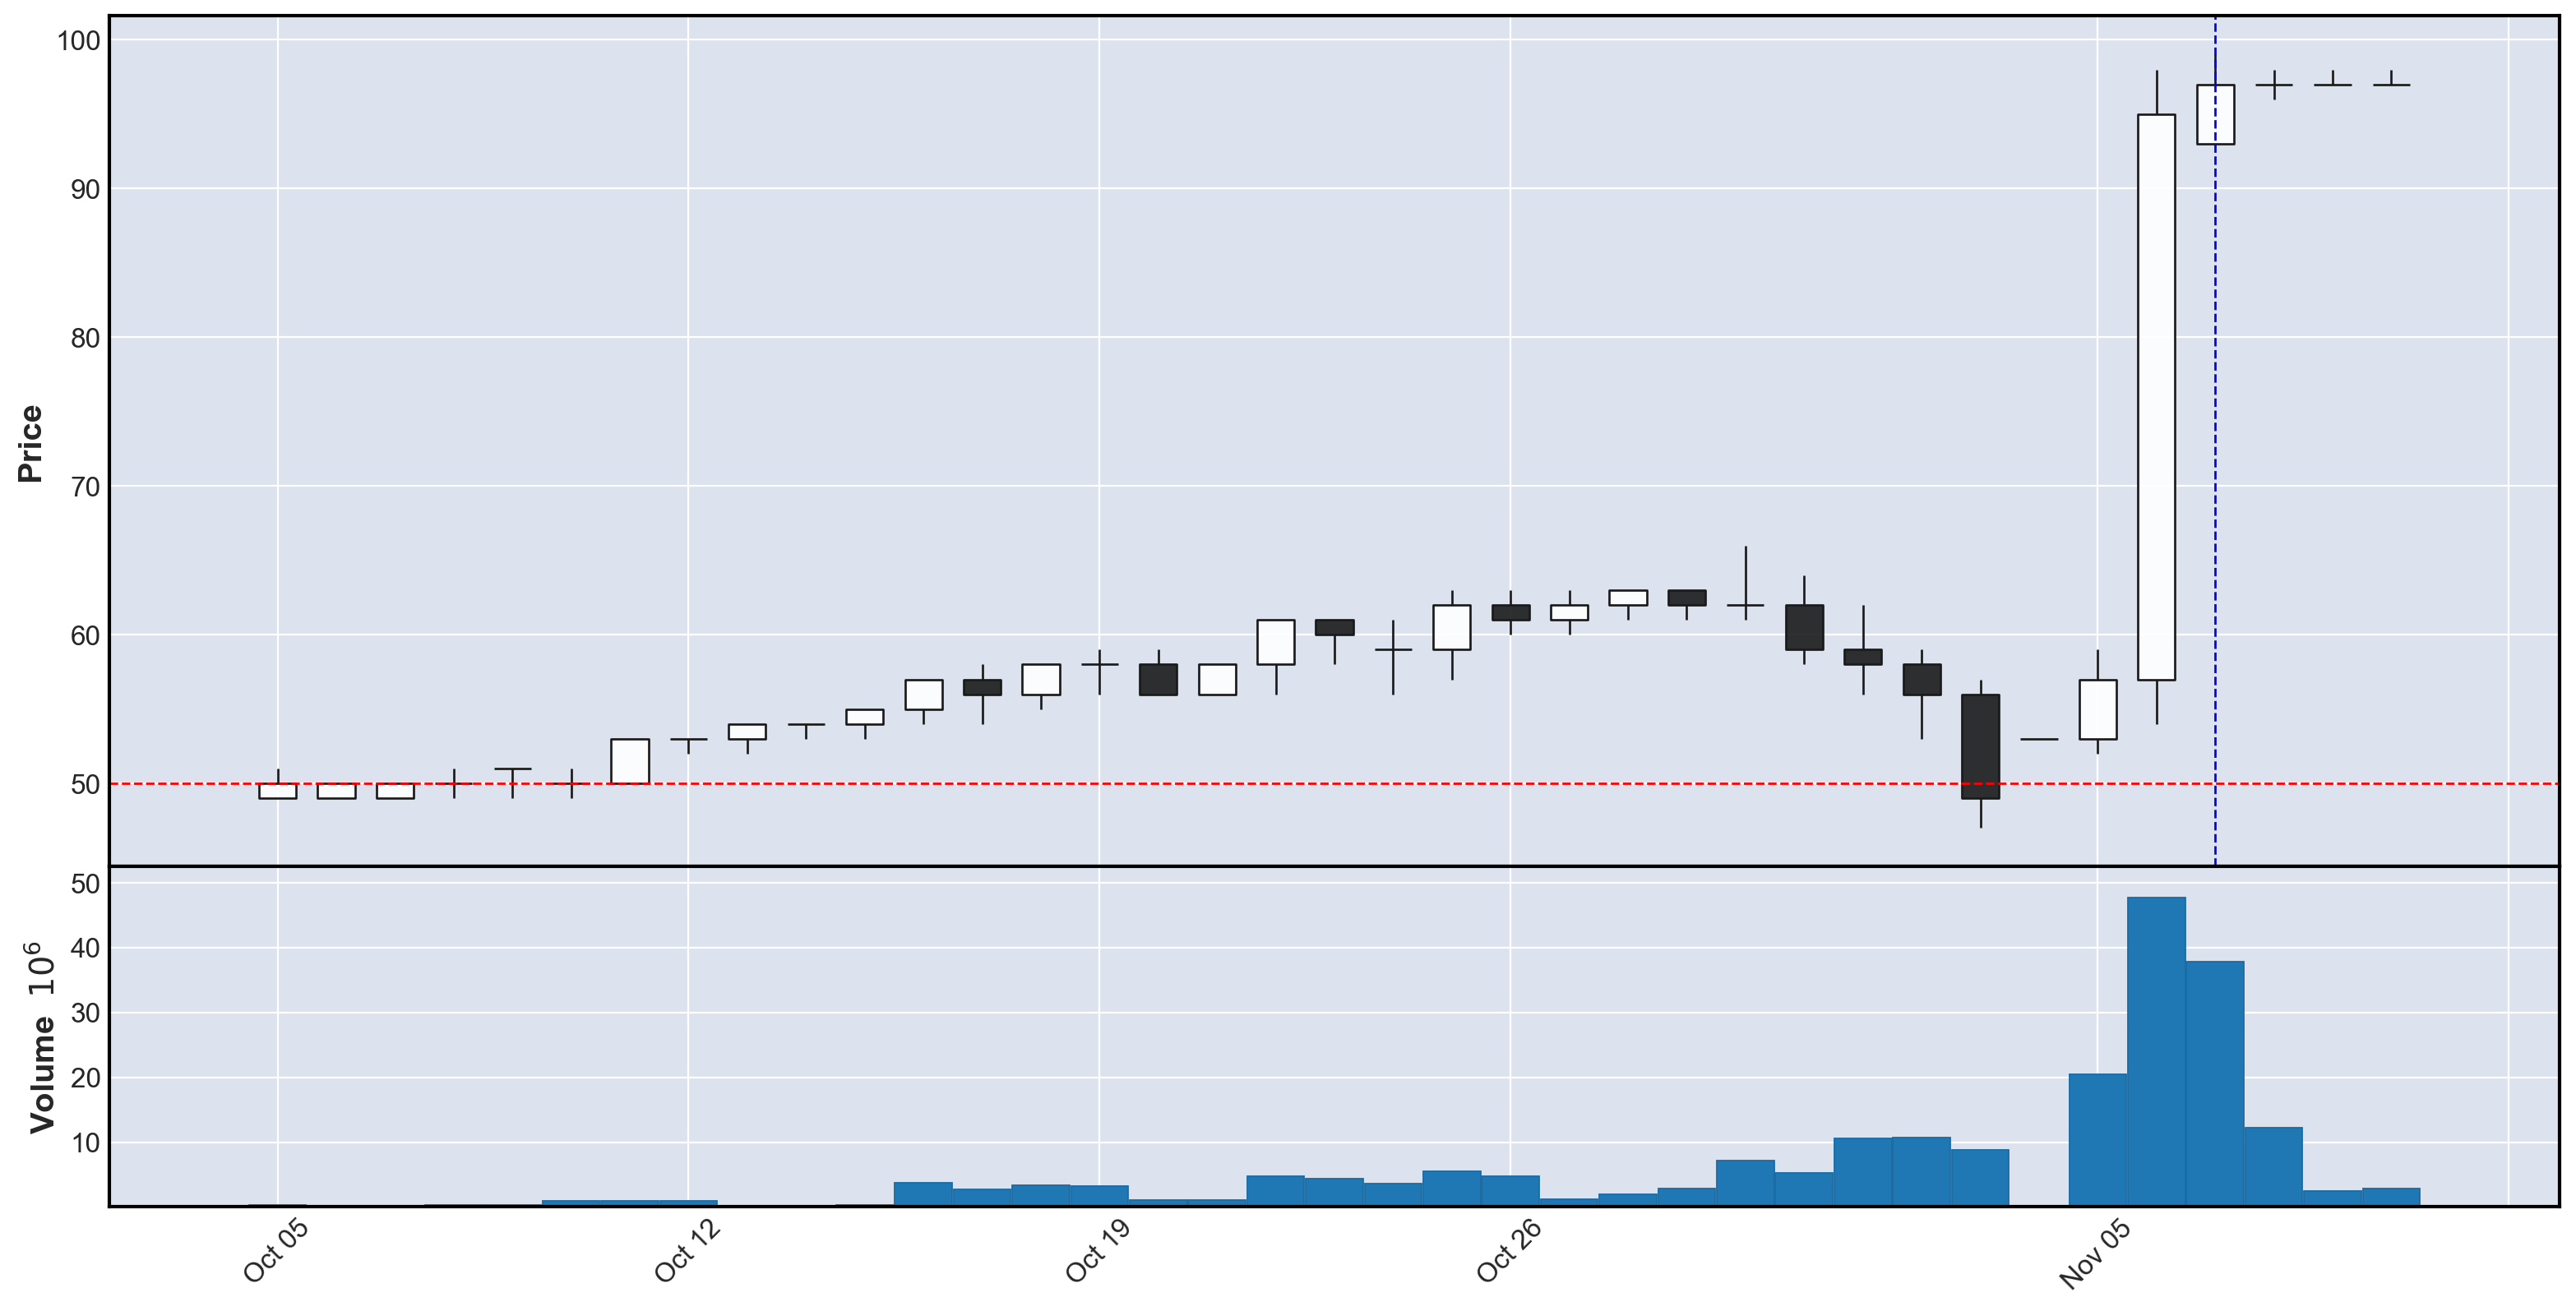

In [46]:
pres_djt_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-DJT",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)

pres_kh_data = market.get_full_market(
    series_ticker="PRES",
    ticker="PRES-2024-KH",
    # start_ts="04/01/2024",
    end_ts="11/10/2024",
    period_interval='d'
)
djt_df = market.candlesticks_to_df(pres_djt_data)
kh_df = market.candlesticks_to_df(pres_kh_data)

djt_candlestick_df = market.build_candlestick(pres_djt_data)
kh_candlestick_df = market.build_candlestick(pres_kh_data)

fig, axes = mpf.plot(
    kh_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Set y-axis limits for the price chart (first axes object)
# axes[0].set_ylim(0, 60)  # customize as needed

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here


fig, axes = mpf.plot(
    djt_candlestick_df,
    volume=True,
    figratio=(20, 10),
    figscale=1.8,
    show_nontrading=False,
    mav=3*24,
    returnfig=True,
    type='candle',
)

# Add a horizontal line at y=50
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=1)
axes[0].axvline(x=datetime.strptime('Feb 3 1970 00:00', '%b %d %Y %H:%M'), color='blue', linestyle='--', linewidth=1) # Don't know why date is fucked up here

In [47]:
markets_df.sort_values(by='volume', ascending=False)

ticker            event_ticker market_type  \
1814769               PRES-2024-KH               PRES-2024      binary   
1814766              PRES-2024-DJT               PRES-2024      binary   
1499794               KXNBA-25-IND                KXNBA-25      binary   
1814236               POPVOTE-24-D              POPVOTE-24      binary   
1814235               POPVOTE-24-R              POPVOTE-24      binary   
...                            ...                     ...         ...   
228699   KXETHD-25JUN1909-T1839.99        KXETHD-25JUN1909      binary   
228700   KXETHD-25JUN1909-T1819.99        KXETHD-25JUN1909      binary   
228701   KXETHD-25JUN1909-T1799.99        KXETHD-25JUN1909      binary   
228702   KXETHD-25JUN1909-T1779.99        KXETHD-25JUN1909      binary   
1        KXMLSGAME-25JUL16SJDAL-SJ  KXMLSGAME-25JUL16SJDAL      binary   

                                                     title  \
1814769  Will Kamala Harris or another Democrat win the...   
1814766  Will Donald Trump or another Republican win th...   
1499794        Will the Indiana Pacers win the NBA Finals?   
1814236    Will the Democratic party win the popular vote?   
1814235    Will the Republican party win the popular vote?   
...                                                    ...   
228699          Ethereum price at Jun 19, 2025 at 9am EDT?   
228700          Ethereum price at Jun 19, 2025 at 9am EDT?   
228701          Ethereum price at Jun 19, 2025 at 9am EDT?   
228702          Ethereum price at Jun 19, 2025 at 9am EDT?   
1                               San Jose vs Dallas Winner?   

                         subtitle    yes_sub_title     no_sub_title  \
1814769    :: or another Democrat    Kamala Harris    Kamala Harris   
1814766  :: or another Republican     Donald Trump     Donald Trump   
1499794                       NaN          Indiana          Indiana   
1814236    :: Or another Democrat    Kamala Harris    Kamala Harris   
1814235  :: Or another Republican     Donald Trump     Donald Trump   
...                           ...              ...              ...   
228699            $1,840 or above  $1,840 or above  $1,840 or above   
228700            $1,820 or above  $1,820 or above  $1,820 or above   
228701            $1,800 or above  $1,800 or above  $1,800 or above   
228702            $1,780 or above  $1,780 or above  $1,780 or above   
1                             NaN         San Jose         San Jose   

                    open_time                   close_time  \
1814769  2024-10-04T12:15:00Z  2025-01-20T17:03:48.078202Z   
1814766  2024-10-04T12:15:00Z  2025-01-20T17:03:48.078202Z   
1499794  2025-01-23T13:00:00Z  2025-06-23T02:51:09.791711Z   
1814236  2024-10-07T12:15:00Z  2025-01-06T19:16:12.683659Z   
1814235  2024-10-07T12:15:00Z  2025-01-06T19:16:12.683659Z   
...                       ...                          ...   
228699   2025-06-19T12:00:00Z         2025-06-19T13:00:00Z   
228700   2025-06-19T12:00:00Z         2025-06-19T13:00:00Z   
228701   2025-06-19T12:00:00Z         2025-06-19T13:00:00Z   
228702   2025-06-19T12:00:00Z         2025-06-19T13:00:00Z   
1        2025-07-12T00:05:00Z         2027-07-17T02:30:00Z   

        expected_expiration_time  ... custom_strike.Joins/Leaves  \
1814769     2025-01-21T15:00:00Z  ...                        NaN   
1814766     2025-01-21T15:00:00Z  ...                        NaN   
1499794     2025-06-30T14:00:00Z  ...                        NaN   
1814236     2025-01-07T15:00:00Z  ...                        NaN   
1814235     2025-01-07T15:00:00Z  ...                        NaN   
...                          ...  ...                        ...   
228699      2025-06-19T13:05:00Z  ...                        NaN   
228700      2025-06-19T13:05:00Z  ...                        NaN   
228701      2025-06-19T13:05:00Z  ...                        NaN   
228702      2025-06-19T13:05:00Z  ...                        NaN   
1           2025-07-17T05:30:00Z  ...           

In [48]:
# very liquid tested markets {'market ticker': 'market question}
tested_markets = {'PRES-2024-KH': 'Will Kamala Harris or another Democrat win the Presidency?',
'PRES-2024-DJT': 'Will Donald Trump or another Republican win the Presidency?',
'KXNBA-25-IND': 'Will the Indiana Pacers win the NBA Finals?',
'KXNBA-25-OKC': 'Will the Oklahoma City Thunder win the NBA Finals?',
'POPVOTE-24-D': 'Will the Democratic party win the popular vote?',
'POPVOTE-24-R': 'Will the Republican party win the popular vote?'}

market_vals = {}
trades_record = {}

for ticker in tested_markets.keys():
    market_vals[ticker] = market.get_full_market(series_ticker=ticker.split('-')[0], ticker=ticker, period_interval='h')['candlesticks']
    trades_record[ticker] = market.get_trades(ticker=ticker)

In [49]:
market.get_trades(ticker='KXNBA-25-IND')

{'trades': [{'trade_id': '8c0304b0-ff6b-4236-8f86-809a66fda7f3',
   'ticker': 'KXNBA-25-IND',
   'count': 1,
   'created_time': '2025-06-23T02:49:55.408062Z',
   'yes_price': 1,
   'no_price': 99,
   'taker_side': 'yes'},
  {'trade_id': '2e98f198-5434-4d4b-a1e2-22c258405218',
   'ticker': 'KXNBA-25-IND',
   'count': 467,
   'created_time': '2025-06-23T02:48:55.15012Z',
   'yes_price': 1,
   'no_price': 99,
   'taker_side': 'yes'},
  {'trade_id': '501ff78b-179b-475b-b994-fb073ef9693c',
   'ticker': 'KXNBA-25-IND',
   'count': 82,
   'created_time': '2025-06-23T02:48:10.911002Z',
   'yes_price': 1,
   'no_price': 99,
   'taker_side': 'yes'},
  {'trade_id': '0064a1a7-72df-44a7-ba39-157e73e7c55c',
   'ticker': 'KXNBA-25-IND',
   'count': 175,
   'created_time': '2025-06-23T02:48:05.593285Z',
   'yes_price': 1,
   'no_price': 99,
   'taker_side': 'yes'},
  {'trade_id': 'd2abde82-1f86-42dc-9436-bdd0d4d01808',
   'ticker': 'KXNBA-25-IND',
   'count': 25,
   'created_time': '2025-06-23T02:47:5

In [50]:
temp = pd.json_normalize(market_vals['KXNBA-25-IND'], sep='_')
from mykalshi import formatting
temp['end_period_ts'] = temp['end_period_ts'].apply(formatting.format_timestamp)
temp

end_period_ts   volume  open_interest  yes_bid_open  yes_bid_low  \
0     01/23/2025 18:00:00        0              0             0            0   
1     01/24/2025 02:00:00     1000           1000             0            0   
2     01/24/2025 08:00:00        0           1000             0            0   
3     01/24/2025 09:00:00        0           1000             0            0   
4     01/24/2025 17:00:00      989           1989             0            0   
...                   ...      ...            ...           ...          ...   
1292  06/22/2025 19:00:00   783315       18907165            30           30   
1293  06/22/2025 20:00:00  1868456       20217390            31           30   
1294  06/22/2025 21:00:00  5886776       22411466            30           16   
1295  06/22/2025 22:00:00  5987488       24607440            24            5   
1296  06/22/2025 23:00:00  5646662       26959155             6            0   

      yes_bid_high  yes_bid_close  yes_ask_open  yes_ask_low  yes_ask_high  \
0                0              0             2            1             2   
1                0              0             1            1             1   
2                0              0             1            1            99   
3                0              0            99            1            99   
4                0              0             1            1             2   
...            ...            ...           ...          ...           ...   
1292            31             31            31           31            32   
1293            31             30            32           31            32   
1294            38             24            32           19            39   
1295            38              6            26            7            39   
1296             7              0             7            1           100   

      yes_ask_close  price_open  price_low  price_high  price_close  \
0                 1         NaN        NaN         NaN          NaN   
1                 1         1.0        1.0         1.0          1.0   
2                99         NaN        NaN         NaN          NaN   
3                 1         NaN        NaN         NaN          NaN   
4                 2         1.0        1.0         1.0          1.0   
...             ...         ...        ...         ...          ...   
1292             32        31.0       30.0        32.0         32.0   
1293             32        32.0       30.0        32.0         32.0   
1294             26        32.0       16.0        39.0         26.0   
1295              7        26.0        5.0        39.0          7.0   
1296            100         7.0        1.0         8.0          1.0   

      price_mean  price_previous  
0            NaN             NaN  
1            1.0             NaN  
2            NaN             1.0  
3            NaN             1.0  
4            1.0             1.0  
...          ...             ...  
1292        31.0            31.0  
1293        31.0            32.0  
1294        25.0            32.0  
1295        19.0             NaN  
1296         2.0             7.0  

[1297 rows x 17 columns]

In [51]:
import pandas as pd
import time
from datetime import datetime

# import your functions however your project is structured:
# e.g.
# from mykalshi.market import get_full_trades, get_full_market
# or
# from market import get_full_trades, get_full_market

# --- CONFIGURE THESE ---
ticker          = 'KXNBA-25-IND'
series_ticker   = ticker.split('-')[0]
period_interval = 'm'    # or 'h', 'd'
rates           = [0.1, 0.2, 0.5, 1, 2]
start_ts        = "01/01/2025"
end_ts          = "07/14/2025"
batch_size      = 100
max_retries     = 3
# -----------------------

results = []

for r in rates:
    # 1) test get_full_trades
    try:
        market.get_full_trades(
            ticker=ticker,
            start_ts=start_ts,
            end_ts=end_ts,
            batch_size=batch_size,
            calls_per_sec=r,
            max_retries=max_retries
        )
        trades_ok = True
    except Exception:
        trades_ok = False

    # wait exactly 1/r seconds before next call
    time.sleep(1.0 / r)

    results.append({
        'calls_per_sec':  r,
        'trades_success': trades_ok,
    })

df = pd.DataFrame(results)
df

calls_per_sec  trades_success
0            0.1           False
1            0.2           False
2            0.5           False
3            1.0           False
4            2.0           False

In [52]:
market.get_full_market(series_ticker="PRES", ticker="PRES-2024-DJT", start_ts="04/01/2024", end_ts="11/10/2024", period_interval='d')

# market.get_trades(ticker="PRES-2024-DJT", min_ts="04/01/2024", max_ts="11/10/2024")

{'ticker': 'PRES-2024-DJT',
 'candlesticks': [{'end_period_ts': 1728100800,
   'yes_bid': {'open': 49, 'low': 49, 'high': 49, 'close': 49},
   'yes_ask': {'open': 100, 'low': 50, 'high': 100, 'close': 50},
   'price': {'open': 49,
    'low': 49,
    'high': 51,
    'close': 50,
    'mean': 49,
    'previous': None},
   'volume': 257284,
   'open_interest': 151640},
  {'end_period_ts': 1728187200,
   'yes_bid': {'open': 49, 'low': 49, 'high': 49, 'close': 49},
   'yes_ask': {'open': 50, 'low': 50, 'high': 50, 'close': 50},
   'price': {'open': 49,
    'low': 49,
    'high': 50,
    'close': 50,
    'mean': 49,
    'previous': 50},
   'volume': 19956,
   'open_interest': 167088},
  {'end_period_ts': 1728273600,
   'yes_bid': {'open': 49, 'low': 49, 'high': 49, 'close': 49},
   'yes_ask': {'open': 50, 'low': 50, 'high': 50, 'close': 50},
   'price': {'open': 49,
    'low': 49,
    'high': 50,
    'close': 50,
    'mean': 49,
    'previous': 50},
   'volume': 32093,
   'open_interest': 171

## 2.0 LOB Tools

In [53]:
orderbook = market.get_market_orderbook(ticker="KXFEDDECISION-25JUL-C25")["orderbook"]
yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

print("\nBids:")
for price, qty in yes_bids:
    print(f"  YES @ {price}¢ × {qty} contracts")

print("Asks:")
for price, qty in yes_asks:
    print(f"  YES @ {price}¢ × {qty} contracts")


Bids:
  YES @ 1¢ × 2122500 contracts
  YES @ 2¢ × 2517769 contracts
  YES @ 3¢ × 1359978 contracts
Asks:
  YES @ 4¢ × 3785872 contracts
  YES @ 5¢ × 1357058 contracts
  YES @ 6¢ × 2735338 contracts
  YES @ 7¢ × 1423803 contracts
  YES @ 8¢ × 21100 contracts
  YES @ 9¢ × 225 contracts
  YES @ 10¢ × 10161 contracts
  YES @ 11¢ × 100 contracts
  YES @ 12¢ × 18481 contracts
  YES @ 15¢ × 100 contracts
  YES @ 18¢ × 234 contracts
  YES @ 19¢ × 385 contracts
  YES @ 20¢ × 729 contracts
  YES @ 21¢ × 1069 contracts
  YES @ 22¢ × 1261 contracts
  YES @ 23¢ × 1625 contracts
  YES @ 24¢ × 1902 contracts
  YES @ 25¢ × 2130 contracts
  YES @ 27¢ × 5100 contracts
  YES @ 28¢ × 500 contracts
  YES @ 30¢ × 30 contracts
  YES @ 35¢ × 1 contracts
  YES @ 43¢ × 222 contracts
  YES @ 44¢ × 500 contracts
  YES @ 49¢ × 600 contracts
  YES @ 50¢ × 22580 contracts
  YES @ 55¢ × 1500 contracts
  YES @ 60¢ × 30 contracts
  YES @ 81¢ × 130 contracts
  YES @ 88¢ × 2000 contracts
  YES @ 95¢ × 902 contracts
  YE

In [54]:
def get_market_lob(ticker):
    orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
    yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
    yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

    print("\nBids:")
    for price, qty in yes_bids:
        print(f"  YES @ {price}¢ × {qty} contracts")

    print("Asks:")
    for price, qty in yes_asks:
        print(f"  YES @ {price}¢ × {qty} contracts")

def plot_market_lob(ticker):
    orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
    yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
    yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

    ask_prices = [p for p, _ in yes_asks]
    ask_sizes = [q for _, q in yes_asks]
    ask_cum = list(np.cumsum(ask_sizes))

    bid_prices = [p for p, _ in yes_bids]
    bid_sizes = [q for _, q in yes_bids]
    bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

    bid_prices_ext = bid_prices + [bid_prices[-1]]
    bid_cum_ext = bid_cum + [0]

    ask_prices_ext = [ask_prices[0]] + ask_prices
    ask_cum_ext = [0] + ask_cum

    plt.figure(figsize=(10, 6))
    plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
    plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

    plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
    plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

    plt.xlabel("Price (¢)")
    plt.ylabel("Cumulative Size")
    plt.title("YES Order Book Depth")
    plt.legend(loc="upper center")
    plt.xlim(0, 100)
    plt.grid(True)

    import matplotlib.ticker as mticker
    max_val = max(max(bid_cum_ext, default=0), max(ask_cum_ext, default=0))
    if max_val >= 1_000_000:
        divisor = 1_000_000
        suffix = "M"
    elif max_val >= 1_000:
        divisor = 1_000
        suffix = "K"
    else:
        divisor = 1
        suffix = ""

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

    plt.tight_layout()
    plt.show()

In [55]:
get_market_lob("KXFEDDECISION-25JUL-C25")


Bids:
  YES @ 1¢ × 2122500 contracts
  YES @ 2¢ × 2517769 contracts
  YES @ 3¢ × 1359978 contracts
Asks:
  YES @ 4¢ × 3785872 contracts
  YES @ 5¢ × 1357058 contracts
  YES @ 6¢ × 2735338 contracts
  YES @ 7¢ × 1423803 contracts
  YES @ 8¢ × 21100 contracts
  YES @ 9¢ × 225 contracts
  YES @ 10¢ × 10161 contracts
  YES @ 11¢ × 100 contracts
  YES @ 12¢ × 18481 contracts
  YES @ 15¢ × 100 contracts
  YES @ 18¢ × 234 contracts
  YES @ 19¢ × 385 contracts
  YES @ 20¢ × 729 contracts
  YES @ 21¢ × 1069 contracts
  YES @ 22¢ × 1261 contracts
  YES @ 23¢ × 1625 contracts
  YES @ 24¢ × 1902 contracts
  YES @ 25¢ × 2130 contracts
  YES @ 27¢ × 5100 contracts
  YES @ 28¢ × 500 contracts
  YES @ 30¢ × 30 contracts
  YES @ 35¢ × 1 contracts
  YES @ 43¢ × 222 contracts
  YES @ 44¢ × 500 contracts
  YES @ 49¢ × 600 contracts
  YES @ 50¢ × 22580 contracts
  YES @ 55¢ × 1500 contracts
  YES @ 60¢ × 30 contracts
  YES @ 81¢ × 130 contracts
  YES @ 88¢ × 2000 contracts
  YES @ 95¢ × 902 contracts
  YE

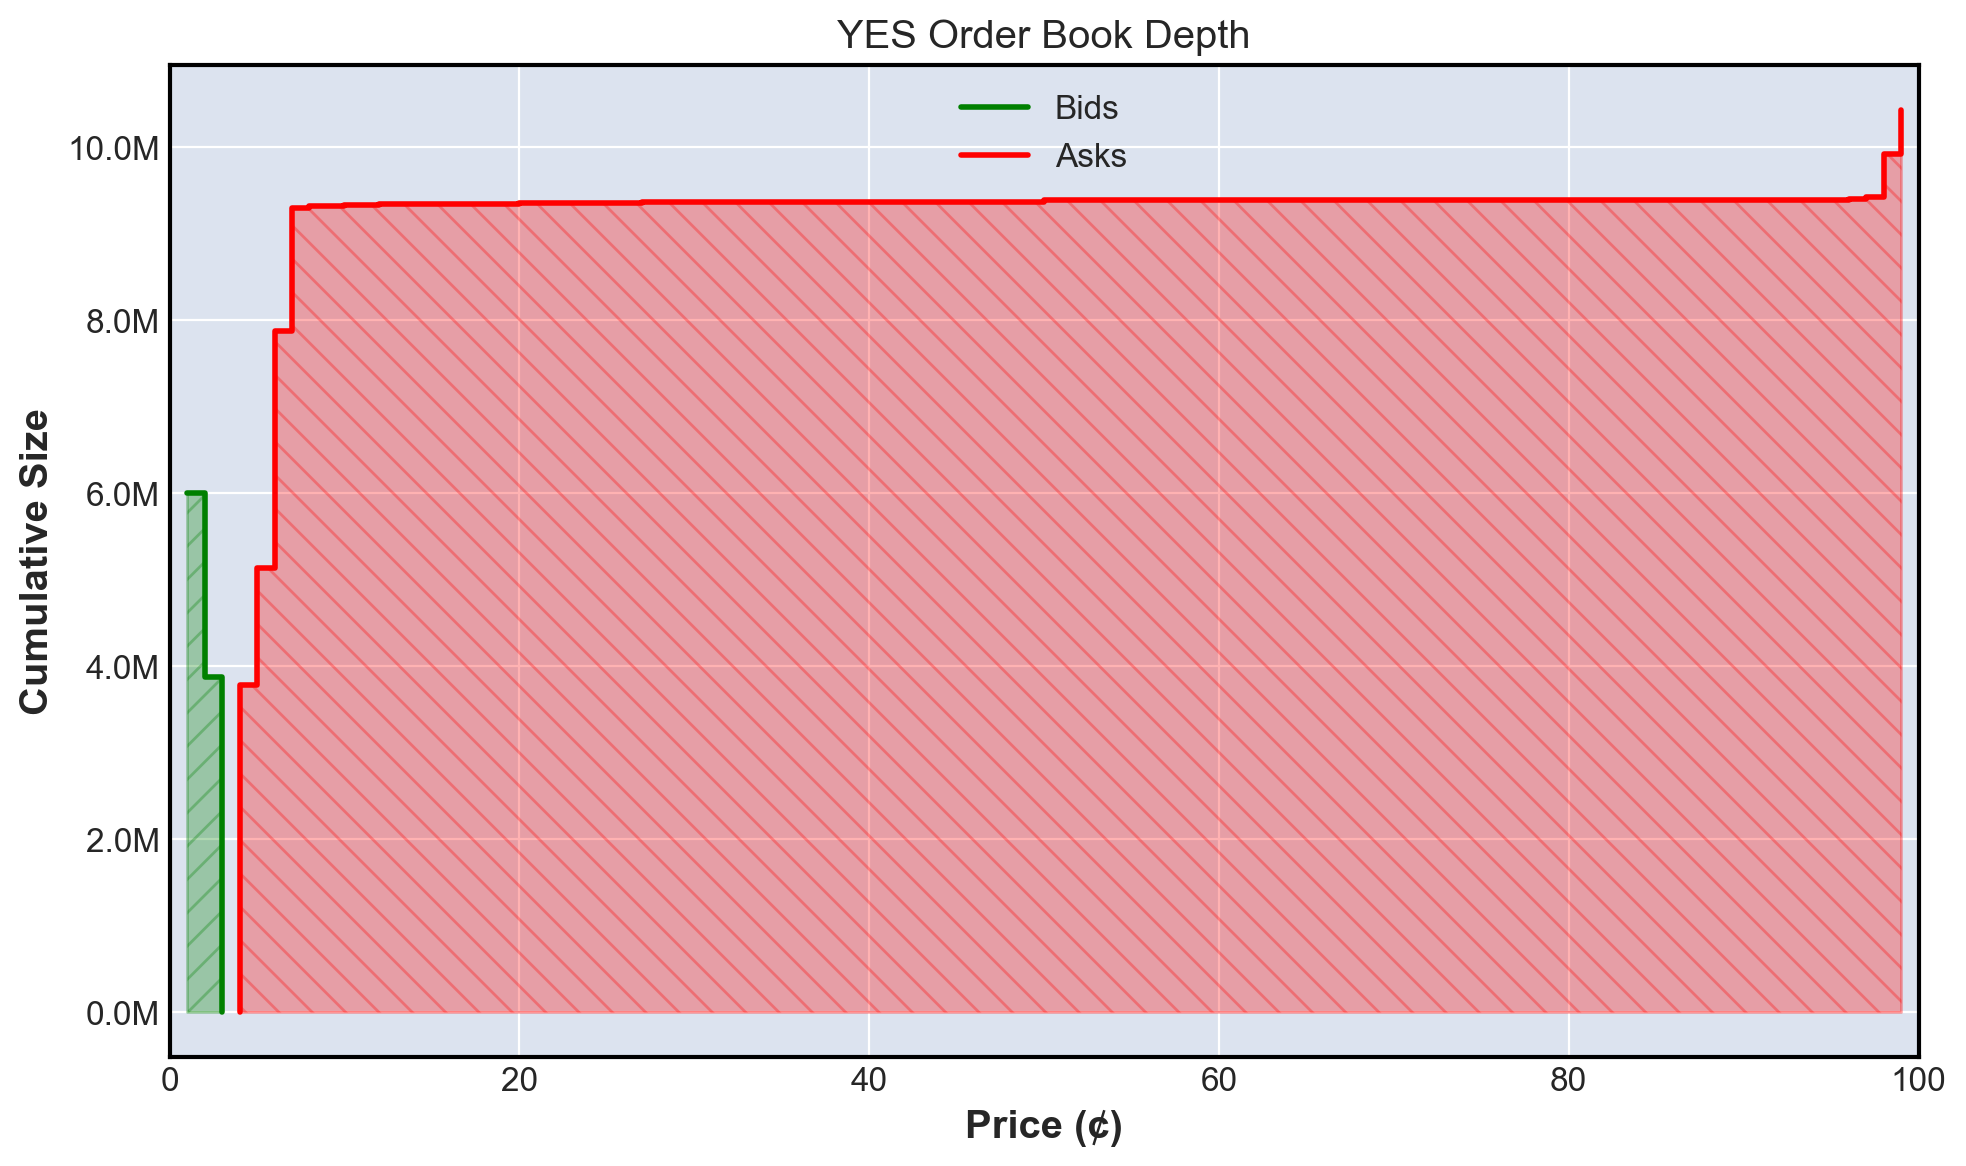

In [56]:
plot_market_lob("KXFEDDECISION-25JUL-C25")

In [57]:
import time
import os

def live_market_lob(ticker, refresh_interval=1):
    try:
        while True:
            loop_start = time.time()
            os.system('cls' if os.name == 'nt' else 'clear')

            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            print(f"Live YES Order Book for {ticker} — refreshed at {time.strftime('%H:%M:%S')}\n")

            print("Bids:")
            for price, qty in yes_bids:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            print("\nAsks:")
            for price, qty in yes_asks:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))

    except KeyboardInterrupt:
        print("\nStopped.")


In [58]:
import time
from IPython.display import clear_output

def live_market_lob_notebook(ticker, refresh_interval=1):
    try:
        while True:
            loop_start = time.time()
            clear_output(wait=True)

            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            print(f"Live YES Order Book for {ticker} — refreshed at {time.strftime('%H:%M:%S')}\n")

            print("Bids:")
            for price, qty in yes_bids:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            print("\nAsks:")
            for price, qty in yes_asks:
                print(f"  YES @ {price}¢ × {qty:,} contracts")

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))

    except KeyboardInterrupt:
        print("\nStopped.")


In [69]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

def live_plot_market_lob(ticker, refresh_interval=1):
    try:
        while True:
            # Get and format orderbook
            loop_start = time.time()
            orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
            yes_bids = sorted(orderbook["yes"], key=lambda x: x[0])
            yes_asks = sorted([[100 - price, size] for price, size in orderbook["no"]], key=lambda x: x[0])

            ask_prices = [p for p, _ in yes_asks]
            ask_sizes = [q for _, q in yes_asks]
            ask_cum = list(np.cumsum(ask_sizes))

            bid_prices = [p for p, _ in yes_bids]
            bid_sizes = [q for _, q in yes_bids]
            bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

            # Extend gracefully to 0 at same price
            bid_prices_ext = bid_prices + [bid_prices[-1]]
            bid_cum_ext = bid_cum + [0]
            ask_prices_ext = [ask_prices[0]] + ask_prices
            ask_cum_ext = [0] + ask_cum

            # Clear and plot
            clear_output(wait=True)
            plt.figure(figsize=(10, 6))
            plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
            plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")

            plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')
            plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

            # Format y-axis with K/M
            import matplotlib.ticker as mticker
            max_val = max(max(bid_cum_ext, default=0), max(ask_cum_ext, default=0))
            if max_val >= 1_000_000:
                divisor = 1_000_000
                suffix = "M"
            elif max_val >= 1_000:
                divisor = 1_000
                suffix = "K"
            else:
                divisor = 1
                suffix = ""
            plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

            plt.xlabel("Price (¢)")
            plt.ylabel("Cumulative Size")
            plt.title(f"YES Order Book Depth — {ticker} ({time.strftime('%H:%M:%S')})")
            plt.legend(loc="upper center")
            plt.xlim(1, 99)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            elapsed = time.time() - loop_start
            time.sleep(max(0, refresh_interval - elapsed))


    except KeyboardInterrupt:
        clear_output(wait=True)
        print("Live plot stopped.")


In [70]:
market.get_trades("KXFEDDECISION-25JUL-C25", min_ts="11/01/2024", )

{'trades': [{'trade_id': 'cbf19705-d03a-4ddb-973b-82f1bfd389fc',
   'ticker': 'KXFEDDECISION-25JUL-C25',
   'count': 1,
   'created_time': '2025-07-24T16:47:44.693214Z',
   'yes_price': 4,
   'no_price': 96,
   'taker_side': 'yes'},
  {'trade_id': 'feecdfef-67d5-4aaf-bf0b-23a8b0fed3f0',
   'ticker': 'KXFEDDECISION-25JUL-C25',
   'count': 200,
   'created_time': '2025-07-24T16:46:59.785859Z',
   'yes_price': 4,
   'no_price': 96,
   'taker_side': 'yes'},
  {'trade_id': '0f3eee60-1a53-48dd-9e75-e6acee321080',
   'ticker': 'KXFEDDECISION-25JUL-C25',
   'count': 4,
   'created_time': '2025-07-24T16:45:35.078974Z',
   'yes_price': 4,
   'no_price': 96,
   'taker_side': 'yes'},
  {'trade_id': '39a0b5c3-8668-475d-83d6-a8b0d3105ac9',
   'ticker': 'KXFEDDECISION-25JUL-C25',
   'count': 800,
   'created_time': '2025-07-24T16:45:34.362552Z',
   'yes_price': 4,
   'no_price': 96,
   'taker_side': 'yes'},
  {'trade_id': '1c0b9af4-b4a4-4570-8b8f-fc65831701b5',
   'ticker': 'KXFEDDECISION-25JUL-C25',

In [62]:
live_market_lob_notebook("KXFEDDECISION-25JUL-C25")

Live YES Order Book for KXFEDDECISION-25JUL-C25 — refreshed at 12:46:57

Bids:
  YES @ 1¢ × 2,122,500 contracts
  YES @ 2¢ × 2,517,769 contracts
  YES @ 3¢ × 1,359,989 contracts

Asks:
  YES @ 4¢ × 3,780,032 contracts
  YES @ 5¢ × 1,357,058 contracts
  YES @ 6¢ × 2,735,338 contracts
  YES @ 7¢ × 1,423,803 contracts
  YES @ 8¢ × 21,100 contracts
  YES @ 9¢ × 225 contracts
  YES @ 10¢ × 10,161 contracts
  YES @ 11¢ × 100 contracts
  YES @ 12¢ × 18,481 contracts
  YES @ 15¢ × 100 contracts
  YES @ 18¢ × 234 contracts
  YES @ 19¢ × 385 contracts
  YES @ 20¢ × 729 contracts
  YES @ 21¢ × 1,069 contracts
  YES @ 22¢ × 1,261 contracts
  YES @ 23¢ × 1,625 contracts
  YES @ 24¢ × 1,902 contracts
  YES @ 25¢ × 2,130 contracts
  YES @ 27¢ × 5,100 contracts
  YES @ 28¢ × 500 contracts
  YES @ 30¢ × 30 contracts
  YES @ 35¢ × 1 contracts
  YES @ 43¢ × 222 contracts
  YES @ 44¢ × 500 contracts
  YES @ 49¢ × 600 contracts
  YES @ 50¢ × 22,580 contracts
  YES @ 55¢ × 1,500 contracts
  YES @ 60¢ × 30 c

Live plot stopped.


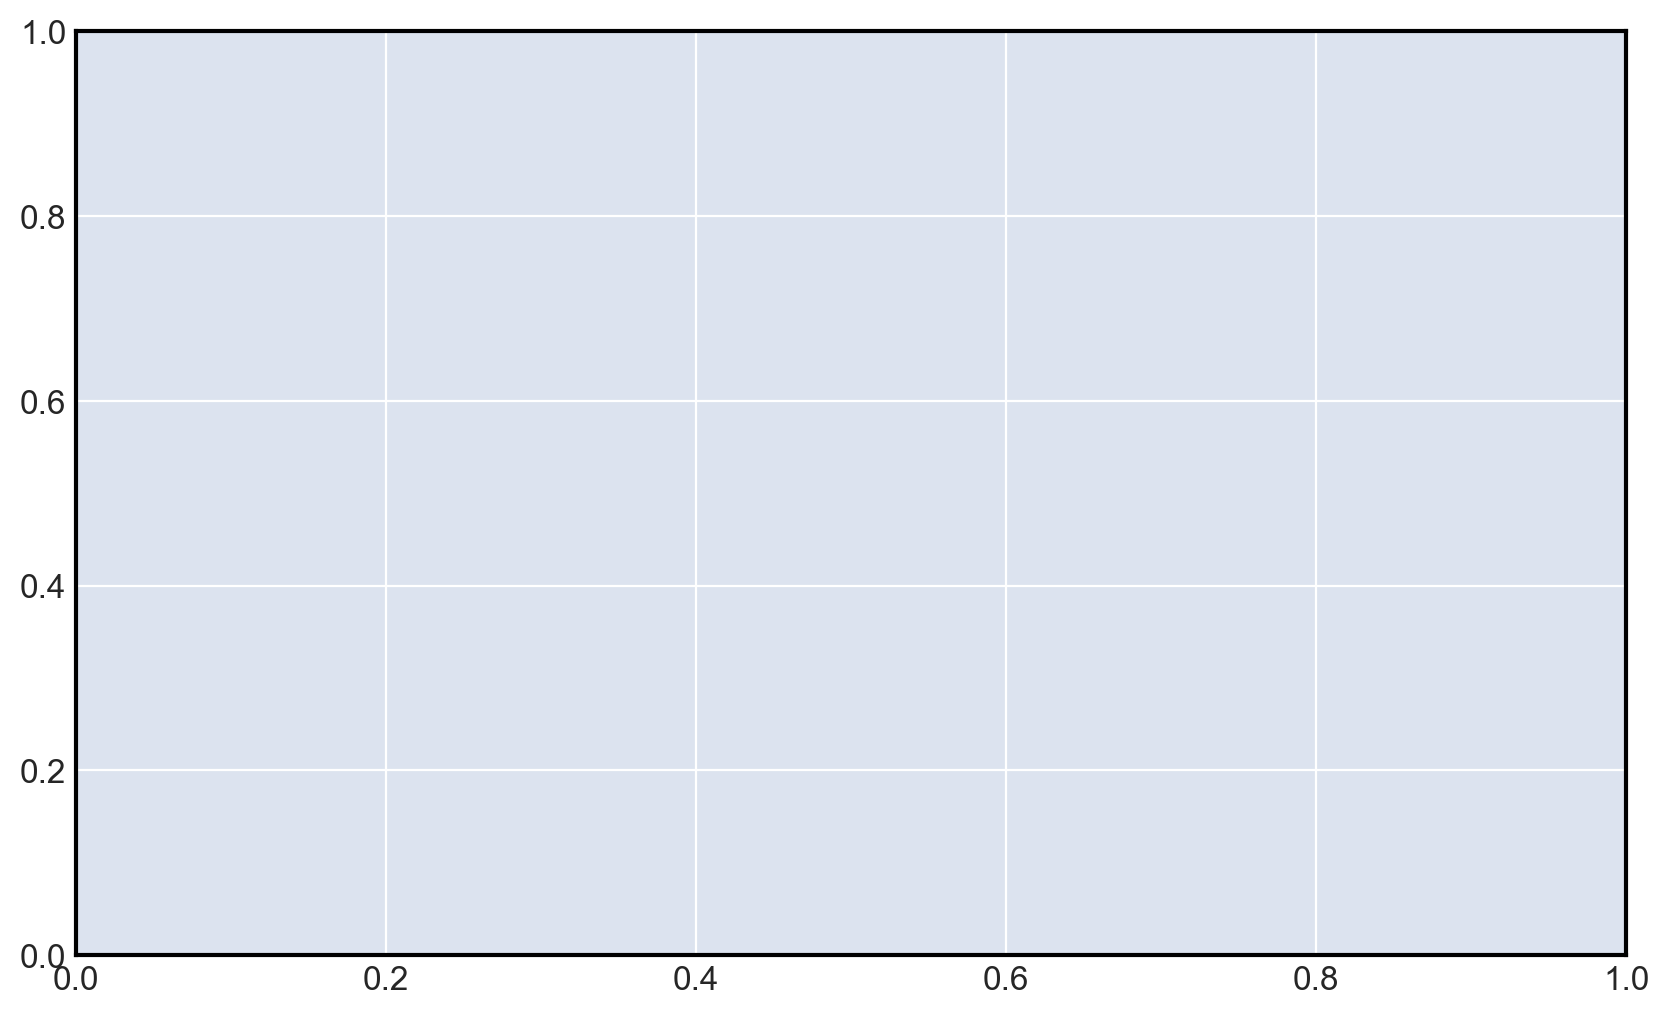

In [68]:
live_plot_market_lob("KXFEDDECISION-25JUL-C25")

In [ ]:
# def record_orderbook_time_series(ticker, duration_secs=60, interval_secs=1.0):
#     import time
#     from datetime import datetime

#     snapshots = []
#     snapshot_count = 0
#     start_time = time.time()

#     try:
#         while time.time() - start_time < duration_secs:
#             loop_start = time.time()

#             # Fetch and parse orderbook
#             orderbook = market.get_market_orderbook(ticker=ticker)["orderbook"]
#             yes_bids = orderbook["yes"]
#             yes_asks = [[100 - price, size] for price, size in orderbook["no"]]

#             bid_snapshot = {int(price): int(size) for price, size in yes_bids if size > 0}
#             ask_snapshot = {int(price): int(size) for price, size in yes_asks if size > 0}

#             now = datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S.%f")[:-3]

#             snapshots.append({
#                 "timestamp": now,
#                 "bids": bid_snapshot,
#                 "asks": ask_snapshot
#             })

#             snapshot_count += 1

#             elapsed = time.time() - loop_start
#             time.sleep(max(0, interval_secs - elapsed))

#     except KeyboardInterrupt:
#         print("Stopped by user.")

#     import sys
#     from sys import getsizeof

#     total_bytes = sum(getsizeof(s) for s in snapshots)
#     size_mb = total_bytes / (1024 ** 2)

#     print(f"\nRecording complete: {snapshot_count} snapshots collected.")
#     print(f"Total memory used: {size_mb:.2f} MB")

#     return snapshots


In [24]:
# snapshot = record_orderbook_time_series("KXFEDDECISION-25JUL-C25", duration_secs=60, interval_secs=1)

In [ ]:
# import pandas as pd

# def snapshot_list_to_dfs(snapshots):
#     price_levels = list(range(101))
#     bids_ts = pd.DataFrame(columns=price_levels)
#     asks_ts = pd.DataFrame(columns=price_levels)

#     for snap in snapshots:
#         timestamp = snap["timestamp"]
#         bids_row = {int(p): snap["bids"].get(p, 0) for p in price_levels}
#         asks_row = {int(p): snap["asks"].get(p, 0) for p in price_levels}
#         bids_ts.loc[timestamp] = bids_row
#         asks_ts.loc[timestamp] = asks_row

#     return bids_ts.astype(int), asks_ts.astype(int)

In [71]:
# # Convert back to DataFrames
# bids_df, asks_df = snapshot_list_to_dfs(snapshot)

# asks_df

In [72]:
# open_mkts.sort_values(by='volume', ascending=False)

In [73]:
import time
import random
import threading
import queue
import json
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor, as_completed
from requests.exceptions import HTTPError

class MarketLOBRecorder:
    def __init__(self,
                 tickers,
                 interval_secs: float = 0.5,
                 max_workers: int = None,
                 max_retries: int = 5,
                 base_backoff: float = 0.1,
                 calls_per_sec: int = 30,
                 output_path: str = "lob_stream.jsonl"):
        self.tickers = tickers
        self.interval_secs = interval_secs
        self.max_retries = max_retries
        self.base_backoff = base_backoff

        # sensible default for max_workers
        self.max_workers = max_workers if max_workers is not None else min(32, len(tickers))
        self._executor = ThreadPoolExecutor(self.max_workers)

        # rate-limiter setup based on API tier
        self.min_interval = 1.0 / calls_per_sec
        self._lock = threading.Lock()
        self._last_call = 0.0

        # error tracking
        self.error_counts = {tk: 0 for tk in tickers}

        # streaming writer setup
        self._write_q = queue.Queue(maxsize=10000)
        self._out_fh = open(output_path, "w")
        self._writer_thread = threading.Thread(target=self._writer_loop, daemon=True)
        self._writer_thread.start()

    def _writer_loop(self):
        """Continuously write JSONL records from the queue to disk."""
        while True:
            rec = self._write_q.get()
            if rec is None:
                break
            self._out_fh.write(json.dumps(rec) + "\n")
            # flush occasionally for safety
            if self._write_q.qsize() < 100:
                self._out_fh.flush()
        self._out_fh.flush()
        self._out_fh.close()

    def _wait_rate_limit(self):
        """Enforce global calls_per_sec limit across threads."""
        with self._lock:
            now = time.time()
            elapsed = now - self._last_call
            if elapsed < self.min_interval:
                time.sleep(self.min_interval - elapsed)
            self._last_call = time.time()

    def _fetch_one(self, ticker):
        """Fetch a single LOB with retries, backoff, and rate-limiting."""
        last_exc = None
        for attempt in range(1, self.max_retries + 1):
            try:
                self._wait_rate_limit()
                resp = market.get_market_orderbook(ticker=ticker)
                book = resp.get("orderbook") or {}
                yes_list = book.get("yes") if isinstance(book.get("yes"), list) else []
                no_list = book.get("no") if isinstance(book.get("no"), list) else []

                bids = {int(p): int(sz) for p, sz in yes_list if sz > 0}
                asks = {int(100-p): int(sz) for p, sz in no_list if sz > 0}

                if not yes_list and not no_list:
                    raise ValueError("Empty orderbook arrays")

                record = {
                    "timestamp": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S.%f")[:-3],
                    "ticker": ticker,
                    "bids": bids,
                    "asks": asks
                }
                return record

            except HTTPError as http_err:
                status = getattr(http_err.response, "status_code", None)
                if status == 429 and attempt < self.max_retries:
                    # exponential backoff + jitter
                    delay = self.base_backoff * (2 ** (attempt - 1))
                    delay *= random.uniform(0.8, 1.2)
                    time.sleep(delay)
                    last_exc = http_err
                    continue
                last_exc = http_err
                break

            except Exception as exc:
                # jitter on other errors
                delay = self.base_backoff * random.uniform(0.5, 1.5)
                time.sleep(delay)
                last_exc = exc
                continue

        # all retries exhausted or forced error
        self.error_counts[ticker] += 1
        record = {
            "timestamp": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S.%f")[:-3],
            "ticker": ticker,
            "bids": {},
            "asks": {},
            "error": repr(last_exc)
        }
        return record

    def _fetch_all(self):
        """Fetch LOBs for all tickers in parallel and stream records to disk."""
        futures = {self._executor.submit(self._fetch_one, tk): tk for tk in self.tickers}
        records = [f.result() for f in as_completed(futures)]
        for rec in records:
            self._write_q.put(rec)
        return records

    def start(self, duration_secs: float):
        """Run the polling loop and stream records until duration_secs elapses."""
        end = time.time() + duration_secs
        while time.time() < end:
            cycle_start = time.time()
            self._fetch_all()
            elapsed = time.time() - cycle_start
            time.sleep(max(0, self.interval_secs - elapsed))

        # signal writer thread to shut down
        self._write_q.put(None)
        self._writer_thread.join()
        print("Done streaming to disk.")
        print("Errors by ticker:", self.error_counts)


In [74]:
# import os
# import json
# import time
# import numpy as np
# import pandas as pd

# # ————— PARAMETERS TO SWEEP —————
# ticker_counts = [100, 200]  # number of tickers to record
# intervals    = [5.0, 10.0]  # seconds between cycles
# worker_counts= [22, 44]  # number of threads to use

# duration_secs = 40  # keep runs short for testing

# ALL_TICKERS = open_mkts.sort_values(by='volume', ascending=False)\
#                       .head(200)['ticker'].tolist()

# results = []

# def dump_snapshots_to_jsonl(snaps, fname):
#     with open(fname, "w") as f:
#         for s in snaps:
#             f.write(json.dumps(s) + "\n")
#     return os.path.getsize(fname)

# for n in ticker_counts:
#     tickers = ALL_TICKERS[:n]
#     for interval in intervals:
#         seen_workers = set()
#         for workers in worker_counts:
#             max_workers = min(workers, n)
#             if max_workers in seen_workers:
#                 continue
#             seen_workers.add(max_workers)

#             # initialize and run recorder
#             rec = MarketLOBRecorder(
#                 tickers=tickers,
#                 interval_secs=interval,
#                 max_workers=max_workers
#             )
#             t0 = time.time()
#             rec.start(duration_secs=duration_secs)
#             total_time = time.time() - t0

#             # count errors
#             error_count = sum(rec.error_counts.values())
#             total_snaps = len(rec.snapshots)
#             error_rate  = error_count / total_snaps if total_snaps else float('nan')

#             # dump to JSONL and measure size
#             jsonl_file = f"test_n{n}_int{interval}_w{max_workers}.jsonl"
#             size_bytes = dump_snapshots_to_jsonl(rec.snapshots, jsonl_file)

#             # build DataFrame of timestamps
#             df_snaps = pd.DataFrame(rec.snapshots)
#             df_snaps['ts_dt'] = pd.to_datetime(
#                 df_snaps['timestamp'], format='%Y-%m-%d %H:%M:%S.%f'
#             )

#             # compute per-ticker MSE of observed intervals vs target
#             mse_list = []
#             for _, group in df_snaps.groupby('ticker'):
#                 times  = np.sort(group['ts_dt'].values)
#                 deltas = np.diff(times).astype('timedelta64[ns]').astype(np.float64) / 1e9
#                 errs   = (deltas - interval) ** 2
#                 if len(errs):
#                     mse_list.append(errs.mean())
#             interval_mse = float(np.mean(mse_list)) if mse_list else float('nan')

#             # compute other timing metrics
#             cycles      = total_snaps / n if n else 0
#             avg_cycle   = total_time / cycles if cycles else float("nan")
#             avg_latency = avg_cycle / n if n else float("nan")

#             results.append({
#                 "n_tickers":     n,
#                 "interval_s":    interval,
#                 "max_workers":   max_workers,
#                 "calls_per_sec": rec.calls_per_sec if hasattr(rec, 'calls_per_sec') else None,
#                 "avg_cycle_s":   round(avg_cycle, 3),
#                 "avg_latency_s": round(avg_latency, 3),
#                 "file_size_MB":  round(size_bytes / (1024**2), 3),
#                 "interval_mse":  round(interval_mse,   6),
#                 "error_count":   error_count,
#                 "error_rate":    round(error_rate,    3),
#             })

#             # cleanup
#             os.remove(jsonl_file)
#             print(f"Done n={n}, int={interval}, w={max_workers}, calls={calls} ")

# # summarize in a DataFrame
# df = pd.DataFrame(results)
# df

In [75]:
# open_mkts.sort_values(by='volume', ascending=False).head(500).sort_values(by='close_time', ascending=True)
open_mkts.sort_values(by='close_time', ascending=True).head(3000).sort_values(by='volume', ascending=False)

ticker               event_ticker  \
1646          KXBTCD-25JUL2413-T118749.99           KXBTCD-25JUL2413   
1645          KXBTCD-25JUL2413-T118999.99           KXBTCD-25JUL2413   
1647          KXBTCD-25JUL2413-T118499.99           KXBTCD-25JUL2413   
1185               KXHIGHNY-25JUL24-B86.5           KXHIGHNY-25JUL24   
1644          KXBTCD-25JUL2413-T119249.99           KXBTCD-25JUL2413   
...                                   ...                        ...   
2729  KXNASDAQ100U-25JUL24H1300-T22269.99  KXNASDAQ100U-25JUL24H1300   
2730  KXNASDAQ100U-25JUL24H1300-T22259.99  KXNASDAQ100U-25JUL24H1300   
2731  KXNASDAQ100U-25JUL24H1300-T22249.99  KXNASDAQ100U-25JUL24H1300   
2732  KXNASDAQ100U-25JUL24H1300-T22239.99  KXNASDAQ100U-25JUL24H1300   
2715  KXNASDAQ100U-25JUL24H1300-T22409.99  KXNASDAQ100U-25JUL24H1300   

     market_type                                              title  \
1646      binary                    Bitcoin price  on Jul 24, 2025?   
1645      binary                    Bitcoin price  on Jul 24, 2025?   
1647      binary                    Bitcoin price  on Jul 24, 2025?   
1185      binary  Will the **high temp in NYC** be 86-87° on Jul...   
1644      binary                    Bitcoin price  on Jul 24, 2025?   
...          ...                                                ...   
2729      binary  Will the Nasdaq-100 be above 22269.99 at the e...   
2730      binary  Will the Nasdaq-100 be above 22259.99 at the e...   
2731      binary  Will the Nasdaq-100 be above 22249.99 at the e...   
2732      binary  Will the Nasdaq-100 be above 22239.99 at the e...   
2715      binary  Will the Nasdaq-100 be above 22409.99 at the e...   

               subtitle      yes_sub_title       no_sub_title  \
1646  $118,750 or above  $118,750 or above  $118,750 or above   
1645  $119,000 or above  $119,000 or above  $119,000 or above   
1647  $118,500 or above  $118,500 or above  $118,500 or above   
1185         86° to 87°         86° to 87°         86° to 87°   
1644  $119,250 or above  $119,250 or above  $119,250 or above   
...                 ...                ...                ...   
2729    22,270 or above    22,270 or above    22,270 or above   
2730    22,260 or above    22,260 or above    22,260 or above   
2731    22,250 or above    22,250 or above    22,250 or above   
2732    22,240 or above    22,240 or above    22,240 or above   
2715    22,410 or above    22,410 or above    22,410 or above   

                 open_time            close_time expected_expiration_time  \
1646  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:05:00Z   
1645  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:05:00Z   
1647  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:05:00Z   
1185  2025-07-23T14:00:00Z  2025-07-25T03:59:00Z     2025-07-25T14:00:00Z   
1644  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:05:00Z   
...                    ...                   ...                      ...   
2729  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:00:00Z   
2730  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:00:00Z   
2731  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:00:00Z   
2732  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:00:00Z   
2715  2025-07-24T16:00:00Z  2025-07-24T17:00:00Z     2025-07-24T17:00:00Z   

      ... custom_strike.House Winner custom_strike.President Winner  \
1646  ...                        NaN                            NaN   
1645  ...                        NaN                            NaN   
1647  ...                        NaN                            NaN   
1185  ...                        NaN                            NaN   
1644  ...                        NaN                            NaN   
...   ...                        ...                            ...   
2729  ...                        NaN                            NaN   
2730  ...                        NaN       

In [ ]:
import time
from datetime import datetime
import numpy as np
import pandas as pd

# 1. Prepare tickers
# Replace `open_mkts` with your DataFrame of open markets, sorted by volume
tickers = open_mkts.sort_values(by='volume', ascending=False).head(100)['ticker'].tolist()

# 2. Instantiate recorder: 10s interval, up to 32 threads, 30 calls/sec
rec = MarketLOBRecorder(
    tickers=tickers,
    interval_secs=30,
    max_workers=min(32, len(tickers))
)

# 3. Run 
t0 = time.time()
rec.start(duration_secs=120)
total_duration = time.time() - t0

# 4. Load results from JSONL file
df = pd.read_json("lob_stream.jsonl", lines=True)
df['ts_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

Done streaming to disk.
Errors by ticker: {'KXFEDDECISION-25JUL-C25': 0, 'KXFEDDECISION-25JUL-H0': 0, 'KXWMENSINGLES-25-CA': 0, 'KXWMENSINGLES-25-JS': 0, 'KXWWOMENSINGLES-25-IS': 4, 'KXFEDDECISION-25JUL-C26': 0, 'KXMAYORNYCPARTY-25-EADA': 0, 'RECSSNBER-25': 0, 'KXWWOMENSINGLES-25-ANA': 4, 'KXMAYORNYCPARTY-25-D': 0, 'KXMAYORNYCPARTY-25-AC': 0, 'KXBTCRESERVE-26-JAN01': 0, 'KXNOBELPEACE-25-DJT': 0, 'KXBTCMAXY-25-DEC31-124999.99': 0, 'KXDOED-26-JAN01': 0, 'KXNEWPARTYMUSK-26': 0, 'KXLARGETARIFF': 0, 'KXMAYORNYCPARTY-25-R': 0, 'KXGREENLAND-29': 0, 'LEAVEPOWELL-25-DEC31': 0, 'KXGOVTCUTS-25-250': 0, 'KXRATECUTCOUNT-25DEC31-T0': 0, 'KXPRESNOMD-28-SAS': 0, 'KXBTCMAXY-25-DEC31-149999.99': 0, 'FED-25JUL-T4.25': 0, 'KXPRESNOMD-28-GN': 0, 'KXPRESNOMD-28-AOC': 0, 'KXEPSTEIN-26': 0, 'KXGOVTCUTS-25-1': 0, 'KXPRESNOMD-28-KH': 0, 'KXSHUTDOWNBY-25': 0, 'KXPRESNOMD-28-PB': 0, 'KXGOVTCUTS-25-500': 0, 'KXCPIYOY-25JUN-T2.5': 0, 'KXRATECUTCOUNT-25DEC31-T1': 0, 'KXCPIYOY-25JUN-T2.6': 0, 'KXPRESNOMD-28-WM': 0, '

In [ ]:
# 5. Compute error metrics
total_records = len(df)
error_count = df['error'].notnull().sum()
error_rate = error_count / total_records

# 6. Compute per-ticker precision MSE and overall cycle stats
mse_list = []
all_deltas = []

for tk, group in df.groupby('ticker'):
    times = group.sort_values('ts_dt')['ts_dt']
    deltas = times.diff().dt.total_seconds().dropna()
    if not deltas.empty:
        mse_list.append(((deltas - 10.0)**2).mean())
        all_deltas.extend(deltas.values)

precision_mse = float(np.mean(mse_list)) if mse_list else float('nan')
mean_cycle = float(np.mean(all_deltas)) if all_deltas else float('nan')
std_cycle = float(np.std(all_deltas)) if all_deltas else float('nan')

# 7. Print summary
print(f"Total duration:         {total_duration:.2f} s")
print(f"Total records:          {total_records}")
print(f"Error count:            {error_count}")
print(f"Error rate:             {error_rate:.2%}")
print(f"Precision MSE (10s):    {precision_mse:.6f}")
print(f"Mean cycle length:      {mean_cycle:.3f} s")
print(f"Cycle length std dev:   {std_cycle:.3f} s")


In [52]:
open_mkts[open_mkts['volume'] > 30000].sort_values(by='close_time', ascending=True)

ticker     event_ticker market_type  \
6380           KXRTSMURFS-30       KXRTSMURFS      binary   
5564           KXRTSMURFS-25       KXRTSMURFS      binary   
5563           KXRTSMURFS-20       KXRTSMURFS      binary   
8519           KXRTSMURFS-60       KXRTSMURFS      binary   
8520           KXRTSMURFS-45       KXRTSMURFS      binary   
...                      ...              ...         ...   
9832    KXPRESPERSON-28-JVAN  KXPRESPERSON-28      binary   
9842   KXPRESPERSON-28-GNEWS  KXPRESPERSON-28      binary   
9843    KXPRESPERSON-28-AOCA  KXPRESPERSON-28      binary   
13146              OAIAGI-29           OAIAGI      binary   
11860          KXBOND-30-ATJ        KXBOND-30      binary   

                                                   title  \
6380                       Smurfs Rotten Tomatoes score?   
5564                       Smurfs Rotten Tomatoes score?   
5563                       Smurfs Rotten Tomatoes score?   
8519                       Smurfs Rotten Tomatoes score?   
8520                       Smurfs Rotten Tomatoes score?   
...                                                  ...   
9832        Who will win the next presidential election?   
9842        Who will win the next presidential election?   
9843        Who will win the next presidential election?   
13146          Will OpenAI announce the creation of AGI?   
11860  Will Aaron Taylor-Johnson be the next James Bond?   

                                subtitle             yes_sub_title  \
6380                            Above 30                  Above 30   
5564                            Above 25                  Above 25   
5563                            Above 20                  Above 20   
8519   Above 60:: This movie is "Fresh!"                  Above 60   
8520                          Above 45::                  Above 45   
...                                  ...                       ...   
9832                       :: Republican                J.D. Vance   
9842                       :: Democratic              Gavin Newsom   
9843                       :: Democratic  Alexandria Ocasio-Cortez   
13146                        Before 2030               Before 2030   
11860                                         Aaron Taylor-Johnson   

                   no_sub_title             open_time            close_time  \
6380                   Above 30  2025-07-01T12:00:02Z  2025-07-21T14:00:00Z   
5564                   Above 25  2025-07-02T22:00:44Z  2025-07-21T14:00:00Z   
5563                   Above 20  2025-07-02T22:38:33Z  2025-07-21T14:00:00Z   
8519                   Above 60  2025-06-02T14:00:00Z  2025-07-21T14:00:00Z   
8520                   Above 45  2025-06-02T14:00:00Z  2025-07-21T14:00:00Z   
...                         ...                   ...                   ...   
9832                 J.D. Vance  2025-05-10T14:00:00Z  2029-11-07T15:00:00Z   
9842               Gavin Newsom  2025-05-10T14:00:00Z  2029-11-07T15:00:00Z   
9843   Alexandria Ocasio-Cortez  2025-05-10T14:00:00Z  2029-11-07T15:00:00Z   
13146           Not Before 2030  2024-04-04T12:00:00Z  2030-01-01T04:59:00Z   
11860      Aaron Taylor-Johnson  2025-01-26T15:00:00Z  2030-01-01T15:00:00Z   

      expected_expiration_time  ... custom_strike.House Winner  \
6380      2025-07-21T14:00:00Z  ...                        NaN   
5564      2025-07-21T14:00:00Z  ...                        NaN   
5563      2025-07-21T14:00:00Z  ...                        NaN   
8519      2025-07-21T14:00:00Z  ...                        NaN   
8520      2025-07-21T14:00:00Z  ...                        NaN   
...                        ...  ...                        ...   
9832      2029-01-21T15:00:00Z  ...                        NaN   
9842      2029-01-21T15:00:00Z  ...                        NaN   
9843      2029-01-21T15:00:00Z  ...                        NaN   
13146     2024-12-31T15:00:00Z  ...                        NaN   
11860     2030-01-01T15:00:00Z  ...                 

In [ ]:
# open df from aws s3 bucket
import pandas as pd
import boto3
import io

def load_s3_jsonl(bucket_name, folder_key, file_key):
    s3 = boto3.client('s3')
    # Construct the full S3 key
    full_key = f"{folder_key}/{file_key}" if folder_key else file_key
    # Fetch the object from S3
    response = s3.get_object(Bucket=bucket_name, Key=full_key)
    data = response['Body'].read().decode('utf-8')
    
    # Read the JSONL data into a DataFrame
    df = pd.read_json(io.StringIO(data), lines=True)
    return df

# Example usage
bucket_name = 'mykalshi-lob-logs'
folder_key = 'daily'
file_keys = ['lob_stream_20250717.jsonl', 'lob_stream_20250718.jsonl', 'lob_stream_20250719.jsonl', 'lob_stream_20250720.jsonl', 'lob_stream_20250721.jsonl']

dfs = []

for file_key in file_keys:
    df = load_s3_jsonl(bucket_name, folder_key, file_key)
    dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

In [99]:
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
combined_df_clean = combined_df[combined_df['error'].isnull()]
combined_df_clean

timestamp         ticker  \
0      2025-07-17 07:00:14.139   KXRTSMURFS-0   
1      2025-07-17 07:00:14.234   KXRTSMURFS-5   
2      2025-07-17 07:00:14.335  KXRTSMURFS-10   
3      2025-07-17 07:00:14.433  KXRTSMURFS-15   
4      2025-07-17 07:00:14.532  KXRTSMURFS-20   
...                        ...            ...   
481934 2025-07-21 13:59:51.479  KXRTSMURFS-60   
481935 2025-07-21 13:59:51.578  KXRTSMURFS-45   
481936 2025-07-21 14:00:00.403   KXRTSMURFS-0   
481937 2025-07-21 14:00:00.497   KXRTSMURFS-5   
481938 2025-07-21 14:00:00.593  KXRTSMURFS-10   

                                                     bids  \
0       {'5': 1000, '6': 888, '7': 77, '8': 987, '96':...   
1       {'1': 10, '4': 1000, '7': 999, '8': 991, '79':...   
2       {'3': 1000, '6': 999, '62': 15, '63': 101, '72...   
3       {'1': 666, '38': 1, '39': 10, '40': 115, '77':...   
4             {'1': 1103, '13': 75, '14': 146, '32': 300}   
...                                                   ...   
481934                                                 {}   
481935                                                 {}   
481936  {'5': 1000, '7': 77, '15': 10000, '33': 333, '...   
481937  {'1': 10, '4': 1000, '79': 16, '83': 16, '91':...   
481938  {'3': 1000, '62': 15, '72': 14, '95': 500, '96...   

                                                     asks error  
0                                                      {}   NaN  
1                                                      {}   NaN  
2                                                      {}   NaN  
3       {'99': 950, '98': 104, '94': 556, '92': 604, '...   NaN  
4       {'95': 1102, '83': 900, '82': 11, '81': 133, '...   NaN  
...                                                   ...   ...  
481934  {'98': 1081, '84': 200, '65': 84, '64': 100, '...   NaN  
481935  {'98': 842, '89': 100, '78': 1, '72': 118, '23...   NaN  
481936                                                 {}   NaN  
481937                                                 {}   NaN  
481938                                                 {}   NaN  

[481929 rows x 5 columns]

In [96]:
# chewck start and end timestamps for each df in dfs
for i, df in enumerate(dfs):
    start_ts = df['timestamp'].min()
    end_ts = df['timestamp'].max()
    print(f"File {file_keys[i]}: Start TS: {start_ts}, End TS: {end_ts}")

File lob_stream_20250717.jsonl: Start TS: 2025-07-17 07:00:14.139000, End TS: 2025-07-18 06:59:56.801000
File lob_stream_20250718.jsonl: Start TS: 2025-07-18 07:00:19.005000, End TS: 2025-07-19 06:59:56.226000
File lob_stream_20250719.jsonl: Start TS: 2025-07-19 07:00:19.137000, End TS: 2025-07-20 06:59:51.967000
File lob_stream_20250720.jsonl: Start TS: 2025-07-20 07:00:14.762000, End TS: 2025-07-21 06:59:57.661000
File lob_stream_20250721.jsonl: Start TS: 2025-07-21 07:00:19.793000, End TS: 2025-07-22 06:59:58.131000


In [118]:
import pandas as pd

def snapshot_list_to_dfs(snapshots):
    price_levels = list(range(1, 100))
    
    bids_data = []
    asks_data = []
    timestamps = []

    for snap in snapshots:
        timestamps.append(snap["timestamp"])
        bids_data.append([snap["bids"].get(str(p), 0) for p in price_levels])
        asks_data.append([snap["asks"].get(str(p), 0) for p in price_levels])

    bids_ts = pd.DataFrame(bids_data, index=timestamps, columns=price_levels).astype(int)
    asks_ts = pd.DataFrame(asks_data, index=timestamps, columns=price_levels).astype(int)

    return bids_ts, asks_ts

# Convert filtered rows to list of dicts
filtered_snapshots = combined_df_clean[combined_df_clean['ticker'] == 'KXRTSMURFS-25'].to_dict(orient="records")

# Now pass to your function
bids_df, asks_df = snapshot_list_to_dfs(filtered_snapshots)
asks_df

1    2     3    4     5     6    7    8    9    10  \
2025-07-17 07:00:14.634     0    0     0    0     0     0  300  500  154    0   
2025-07-17 07:00:24.635     0    0     0    0     0     0  300  500  154    0   
2025-07-17 07:00:34.631     0    0     0    0     0     0  300  500  154    0   
2025-07-17 07:00:44.631     0    0     0    0     0     0  300  500  154    0   
2025-07-17 07:00:54.630     0    0     0    0     0     0  300  500  154    0   
...                       ...  ...   ...  ...   ...   ...  ...  ...  ...  ...   
2025-07-21 13:59:10.876  1408  377  2000  622  1151  1000  600  320  284  100   
2025-07-21 13:59:20.876  1408  377  2000  622  1151  1000  600  320  284  100   
2025-07-21 13:59:30.877  1408  377  2000  622  1151  1000  600  320  284  100   
2025-07-21 13:59:40.876  1408  377  2000  622  1151  1000  600  320  284  100   
2025-07-21 13:59:50.879  1408  377  2000  622  1151  1000  600  320  284  100   

                         ...  90  91  92  93  94  95  96  97   98   99  
2025-07-17 07:00:14.634  ...   0   0   0   0   0   0   0   0  100  333  
2025-07-17 07:00:24.635  ...   0   0   0   0   0   0   0   0  100  333  
2025-07-17 07:00:34.631  ...   0   0   0   0   0   0   0   0  100  333  
2025-07-17 07:00:44.631  ...   0   0   0   0   0   0   0   0  100  333  
2025-07-17 07:00:54.630  ...   0   0   0   0   0   0   0   0  100  333  
...                      ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  
2025-07-21 13:59:10.876  ...   0   0   0   0   0   0   0   0  670  333  
2025-07-21 13:59:20.876  ...   0   0   0   0   0   0   0   0  670  333  
2025-07-21 13:59:30.877  ...   0   0   0   0   0   0   0   0  670  333  
2025-07-21 13:59:40.876  ...   0   0   0   0   0   0   0   0  670  333  
2025-07-21 13:59:50.879  ...   0   0   0   0   0   0   0   0  670  333  

[37072 rows x 99 columns]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, IntSlider, fixed
import matplotlib.ticker as mticker

def plot_lob_at_index(idx, bids_ts, asks_ts):
    snapshot_time = bids_ts.index[idx]
    bids = bids_ts.iloc[idx]
    asks = asks_ts.iloc[idx]

    yes_bids = sorted([[p, bids[p]] for p in bids.index if bids[p] > 0], key=lambda x: x[0])
    yes_asks = sorted([[p, asks[p]] for p in asks.index if asks[p] > 0], key=lambda x: x[0])

    bid_prices = [p for p, _ in yes_bids]
    bid_sizes = [q for _, q in yes_bids]
    bid_cum = list(np.cumsum(bid_sizes[::-1]))[::-1]

    ask_prices = [p for p, _ in yes_asks]  # 100 - price transform
    ask_sizes = [q for _, q in yes_asks]
    ask_cum = list(np.cumsum(ask_sizes))

    plt.figure(figsize=(11, 5))

    if yes_bids:
        bid_prices_ext = bid_prices + [bid_prices[-1]]
        bid_cum_ext = bid_cum + [0]
        plt.step(bid_prices_ext, bid_cum_ext, label="Bids", color="green", where="post")
        plt.fill_between(bid_prices_ext, bid_cum_ext, step="post", color="green", alpha=0.3, hatch='//')

    if yes_asks:
        ask_prices_ext = [ask_prices[0]] + ask_prices
        ask_cum_ext = [0] + ask_cum
        plt.step(ask_prices_ext, ask_cum_ext, label="Asks", color="red", where="post")
        plt.fill_between(ask_prices_ext, ask_cum_ext, step="post", color="red", alpha=0.3, hatch='\\\\')

    plt.title(f"LOB at {snapshot_time}")
    plt.xlabel("Price (¢)")
    plt.ylabel("Cumulative Size")
    plt.xlim(0, 100)
    plt.ylim(0, 25000)
    plt.grid(True)
    plt.legend(loc="upper center")

    max_val = 0
    if yes_bids:
        max_val = max(max_val, max(bid_cum, default=0))
    if yes_asks:
        max_val = max(max_val, max(ask_cum, default=0))

    if max_val >= 1_000_000:
        divisor, suffix = 1_000_000, "M"
    elif max_val >= 1_000:
        divisor, suffix = 1_000, "K"
    else:
        divisor, suffix = 1, ""

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x / divisor:.1f}{suffix}"))

    plt.tight_layout()
    plt.show()

# Set up the slider
interact(
    plot_lob_at_index,
    idx=IntSlider(min=0, max=len(bids_df) - 1, step=1, value=0),
    bids_ts=fixed(bids_df),
    asks_ts=fixed(asks_df)
)


interactive(children=(IntSlider(value=0, description='idx', max=37071), Output()), _dom_classes=('widget-inter…

<function __main__.plot_lob_at_index(idx, bids_ts, asks_ts)>

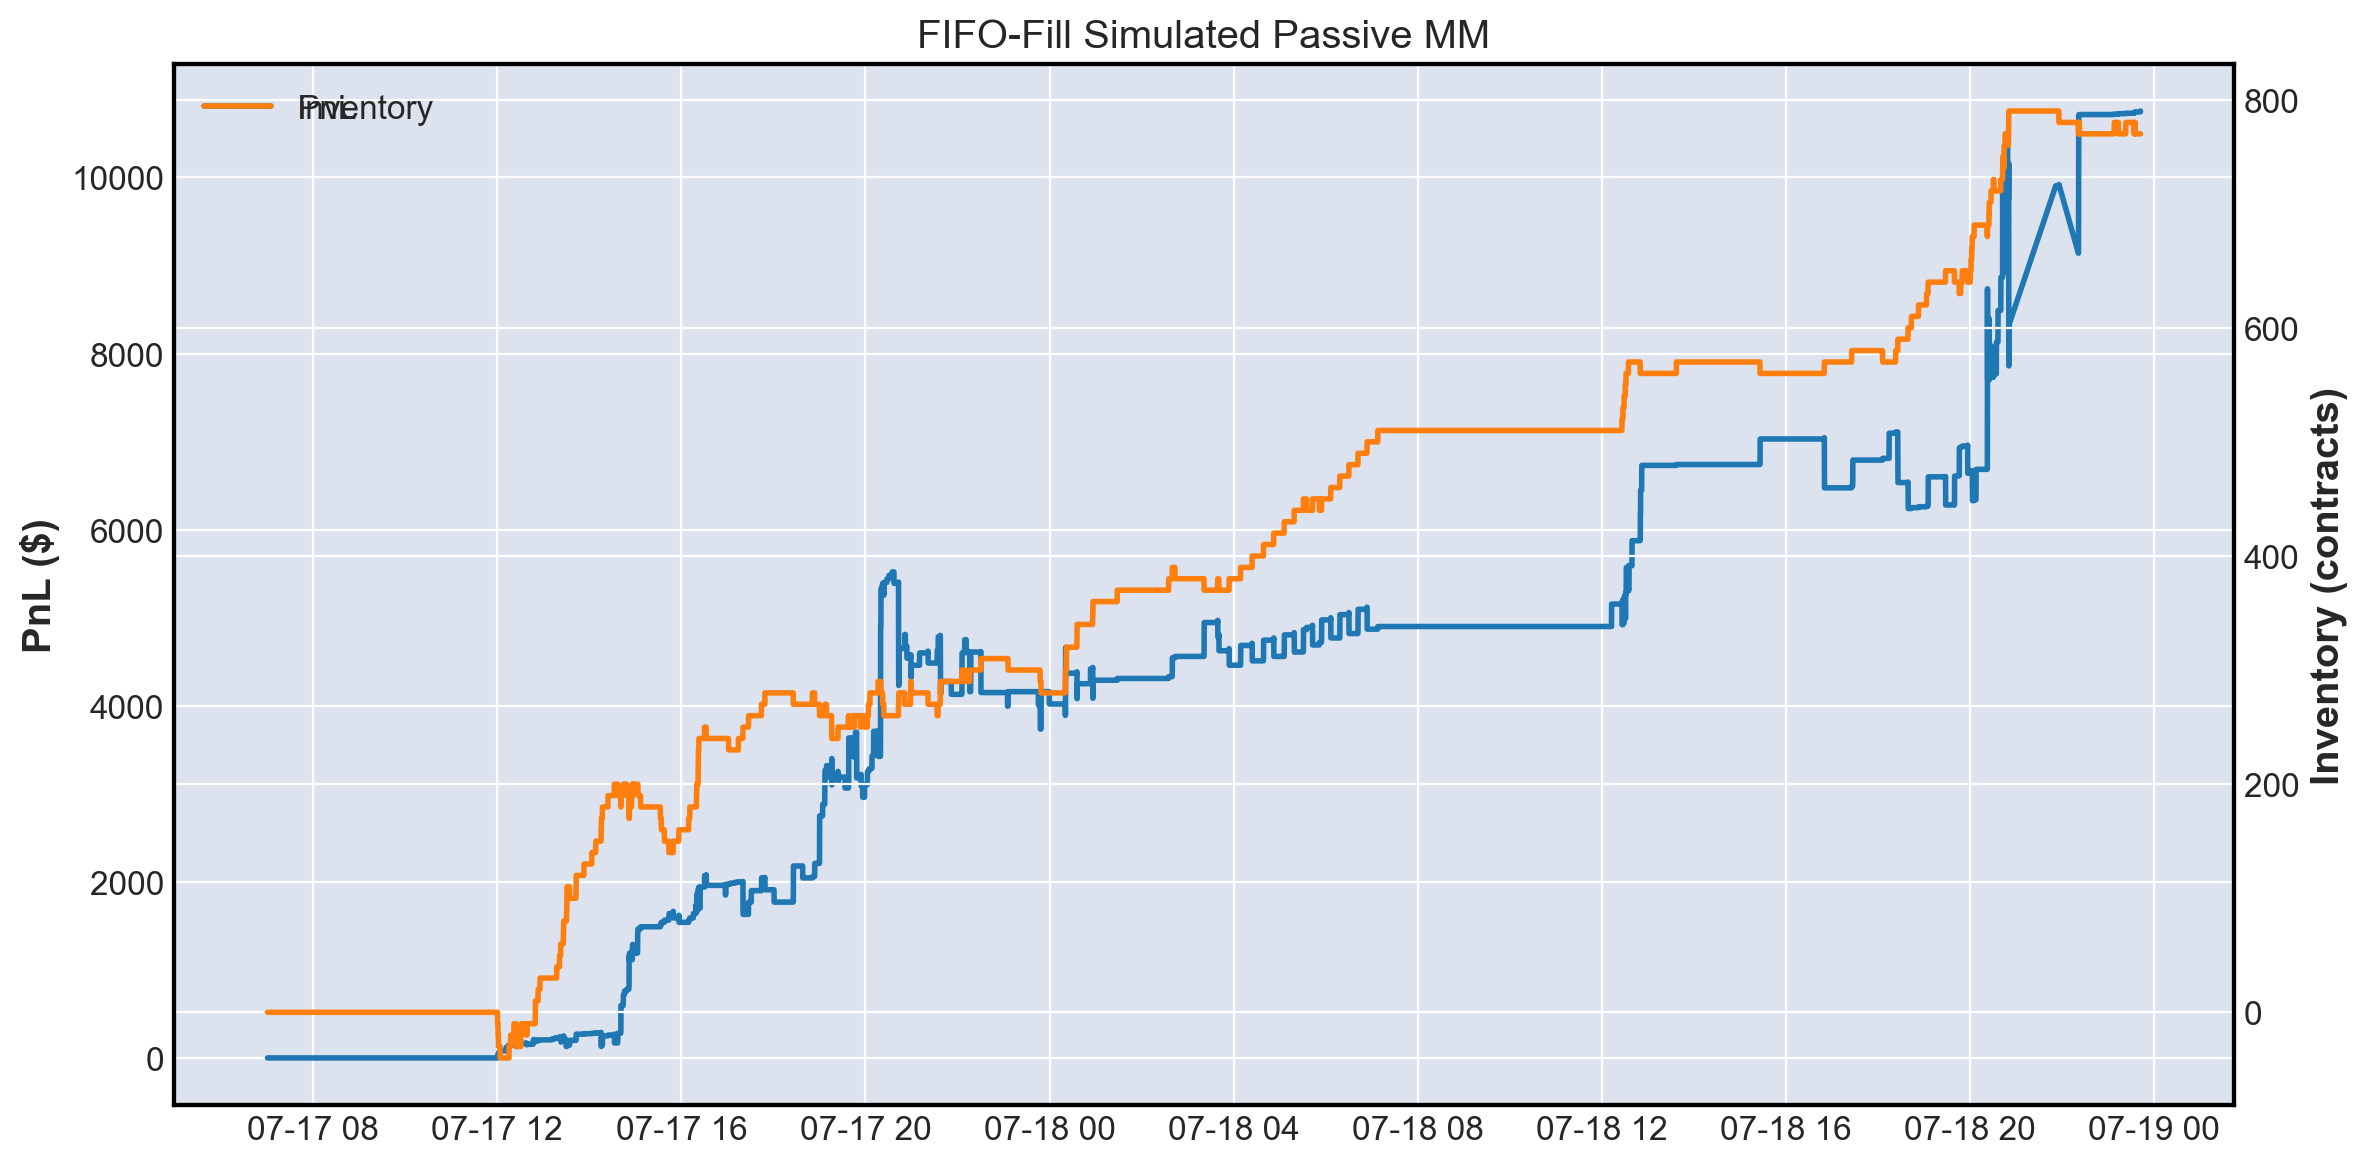

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

order_size = 10
inventory = 0
cash = 0

inventory_path = []
cash_path = []
midprice_path = []
timestamp_path = []

prev_bid_sizes = None
prev_ask_sizes = None

timestamps = bids_df.index.to_list()

for i in range(1, len(timestamps)):
    t_prev = timestamps[i - 1]
    t_curr = timestamps[i]

    bid_prev = bids_df.loc[t_prev]
    ask_prev = asks_df.loc[t_prev]
    bid_curr = bids_df.loc[t_curr]
    ask_curr = asks_df.loc[t_curr]

    bid_prices = [p for p in bid_prev.index if bid_prev[p] > 0]
    ask_prices = [p for p in ask_prev.index if ask_prev[p] > 0]

    if not bid_prices or not ask_prices:
        continue

    best_bid = max(bid_prices)
    best_ask = min(ask_prices)
    mid = 0.5 * (best_bid + best_ask)

    # Check for fill conditions
    # Only assume fill if size at that level dropped by at least our size
    bid_filled = (
        best_bid in bid_curr and
        best_bid in bid_prev and
        (bid_prev[best_bid] - bid_curr[best_bid]) >= order_size
    )
    ask_filled = (
        best_ask in ask_curr and
        best_ask in ask_prev and
        (ask_prev[best_ask] - ask_curr[best_ask]) >= order_size
    )

    if bid_filled:
        inventory += order_size
        cash -= order_size * best_bid

    if ask_filled:
        inventory -= order_size
        cash += order_size * best_ask

    inventory_path.append(inventory)
    cash_path.append(cash)
    midprice_path.append(mid)
    timestamp_path.append(t_curr)

# Final PnL
pnl = pd.Series(cash_path) + pd.Series(inventory_path) * pd.Series(midprice_path)

# plot onl on main y axis and inventory on second y-axis
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10")
plt.plot(timestamp_path, pnl, label="PnL", color=palette[0])
plt.ylabel("PnL ($)")
plt.legend(loc="upper left")
plt.twinx().plot(timestamp_path, inventory_path, label="Inventory", color=palette[1])
plt.ylabel("Inventory (contracts)")
plt.xticks(rotation=45)
plt.title("FIFO-Fill Simulated Passive MM")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.show()


In [121]:
tickers = ['KXRTSMURFS-0', 'KXRTSMURFS-5', 'KXRTSMURFS-10', 'KXRTSMURFS-15', 'KXRTSMURFS-20', 
           'KXRTSMURFS-25', 'KXRTSMURFS-40', 'KXRTSMURFS-35', 'KXRTSMURFS-30', 'KXRTSMURFS-90', 
           'KXRTSMURFS-75', 'KXRTSMURFS-60', 'KXRTSMURFS-45']

results = {}  # Dict to store each market's output

for ticker in tickers:
    snapshots = combined_df_clean[combined_df_clean['ticker'] == ticker].to_dict(orient="records")
    if not snapshots:
        continue
    bids_df, asks_df = snapshot_list_to_dfs(snapshots)

    order_size = 10
    inventory = 0
    cash = 0

    inventory_path = []
    cash_path = []
    midprice_path = []
    timestamp_path = []

    timestamps = bids_df.index.to_list()
    if len(timestamps) < 2:
        continue

    for i in range(1, len(timestamps)):
        t_prev = timestamps[i - 1]
        t_curr = timestamps[i]

        bid_prev = bids_df.loc[t_prev]
        ask_prev = asks_df.loc[t_prev]
        bid_curr = bids_df.loc[t_curr]
        ask_curr = asks_df.loc[t_curr]

        bid_prices = [p for p in bid_prev.index if bid_prev[p] > 0]
        ask_prices = [p for p in ask_prev.index if ask_prev[p] > 0]

        if not bid_prices or not ask_prices:
            continue

        best_bid = max(bid_prices)
        best_ask = min(ask_prices)
        mid = 0.5 * (best_bid + best_ask)

        bid_filled = (
            best_bid in bid_curr and
            best_bid in bid_prev and
            (bid_prev[best_bid] - bid_curr[best_bid]) >= order_size
        )
        ask_filled = (
            best_ask in ask_curr and
            best_ask in ask_prev and
            (ask_prev[best_ask] - ask_curr[best_ask]) >= order_size
        )

        if bid_filled:
            inventory += order_size
            cash -= order_size * best_bid

        if ask_filled:
            inventory -= order_size
            cash += order_size * best_ask

        inventory_path.append(inventory)
        cash_path.append(cash)
        midprice_path.append(mid)
        timestamp_path.append(t_curr)

    if timestamp_path:
        strike = int(ticker.split("-")[-1])
        settled_price = 1.0 if 22.5 > strike else 0.0

        # Series up to expiry
        pnl = pd.Series(cash_path) + pd.Series(inventory_path) * pd.Series(midprice_path)
        pnl.iloc[-1] = cash + inventory * settled_price  # final PnL at resolution

        results[ticker] = {
            "timestamp": timestamp_path,
            "pnl": pnl,
            "inventory": inventory_path
        }


In [134]:
# import matplotlib.pyplot as plt

# n = len(results)
# cols = 2
# rows = (n + cols - 1) // cols
# fig, axs = plt.subplots(rows, cols, figsize=(14, 3.5 * rows), sharex=False)
# axs = axs.flatten()

# for i, (ticker, data) in enumerate(results.items()):
#     ax = axs[i]
#     ax2 = ax.twinx()
#     ax.plot(data["timestamp"], data["pnl"]/100, label="PnL", color="tab:blue")
#     ax2.plot(data["timestamp"], data["inventory"], label="Inventory", color="tab:orange")
#     ax.set_title(ticker)
#     ax.set_ylabel("PnL ($)")
#     ax2.set_ylabel("Inventory")
#     ax2.grid(False)
#     ax.tick_params(axis='x', rotation=45)

# # Hide unused subplots
# for j in range(i + 1, len(axs)):
#     fig.delaxes(axs[j])

# fig.suptitle("Simulated FIFO-Fill MM Performance Across Markets", fontsize=14)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


In [138]:
import time
from mykalshi.market import get_trades
from mykalshi.formatting import parse_timestamp

def get_full_trades_chunked(ticker, start_ts=None, end_ts=None, 
                             batch_size=1000, calls_per_sec=20, window="1d"):
    """
    Fetch full trade history for a market by paginating and chunking over time.
    """

    from datetime import datetime

    
    if isinstance(start_ts, str): start_ts = parse_timestamp(start_ts)
    if isinstance(end_ts, str): end_ts = parse_timestamp(end_ts)

    all_trades = []
    window_sec = {"1h": 3600, "6h": 21600, "1d": 86400, "3d": 259200}[window]
    call_delay = 1 / calls_per_sec

    # Default to full range if not provided
    if not start_ts or not end_ts:
        meta = market.get_market(ticker)["market"]
        start_ts = parse_timestamp(meta["open_time"].replace("Z", "+00:00"))
        end_ts = parse_timestamp(meta["close_time"].replace("Z", "+00:00"))

    cur_start = start_ts
    while cur_start < end_ts:
        cur_end = min(cur_start + window_sec, end_ts)
        cursor = None

        while True:
            time.sleep(call_delay)
            resp = get_trades(ticker=ticker, limit=batch_size, cursor=cursor,
                              min_ts=cur_start, max_ts=cur_end)
            trades = resp.get("trades", [])
            all_trades.extend(trades)
            cursor = resp.get("cursor")
            if not cursor: break

        cur_start = cur_end

    return all_trades


In [143]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

tickers = ['KXRTSMURFS-0', 'KXRTSMURFS-5', 'KXRTSMURFS-10', 'KXRTSMURFS-15', 'KXRTSMURFS-20', 
           'KXRTSMURFS-25', 'KXRTSMURFS-40', 'KXRTSMURFS-35', 'KXRTSMURFS-30', 'KXRTSMURFS-90', 
           'KXRTSMURFS-75', 'KXRTSMURFS-60', 'KXRTSMURFS-45']

order_size = 10
settlement_value = 22.5

results = {}

for ticker in tickers:
    trades_raw = get_full_trades_chunked(ticker, start_ts="07/17/2025", end_ts="07/21/2025")
    if not trades_raw:
        continue

    df = pd.DataFrame(trades_raw)
    df["timestamp"] = pd.to_datetime(df["created_time"])
    df = df.sort_values("timestamp").reset_index(drop=True)

    inventory = 0
    cash = 0
    inv_path, cash_path, time_path = [], [], []

    for _, row in df.iterrows():
        price = row["yes_price"]
        side = row["taker_side"]
        count = row["count"]
        t = row["timestamp"]

        # Only fill if someone crosses you with a trade ≥ order_size
        if side == "buy" and count >= order_size:
            # Taker bought → we were quoting at the ask → we sell
            inventory -= order_size
            cash += order_size * price / 100

        elif side == "sell" and count >= order_size:
            # Taker sold → we were quoting at the bid → we buy
            inventory += order_size
            cash -= order_size * price / 100

        inv_path.append(inventory)
        cash_path.append(cash)
        time_path.append(t)

    strike = int(ticker.split("-")[-1])
    final_settlement = 1.0 if settlement_value > strike else 0.0
    final_pnl = cash + inventory * final_settlement
    pnl_series = pd.Series(cash_path) + pd.Series(inv_path) * final_settlement

    results[ticker] = {
        "timestamp": time_path,
        "pnl": pnl_series,
        "inventory": inv_path,
        "final_pnl": final_pnl
    }


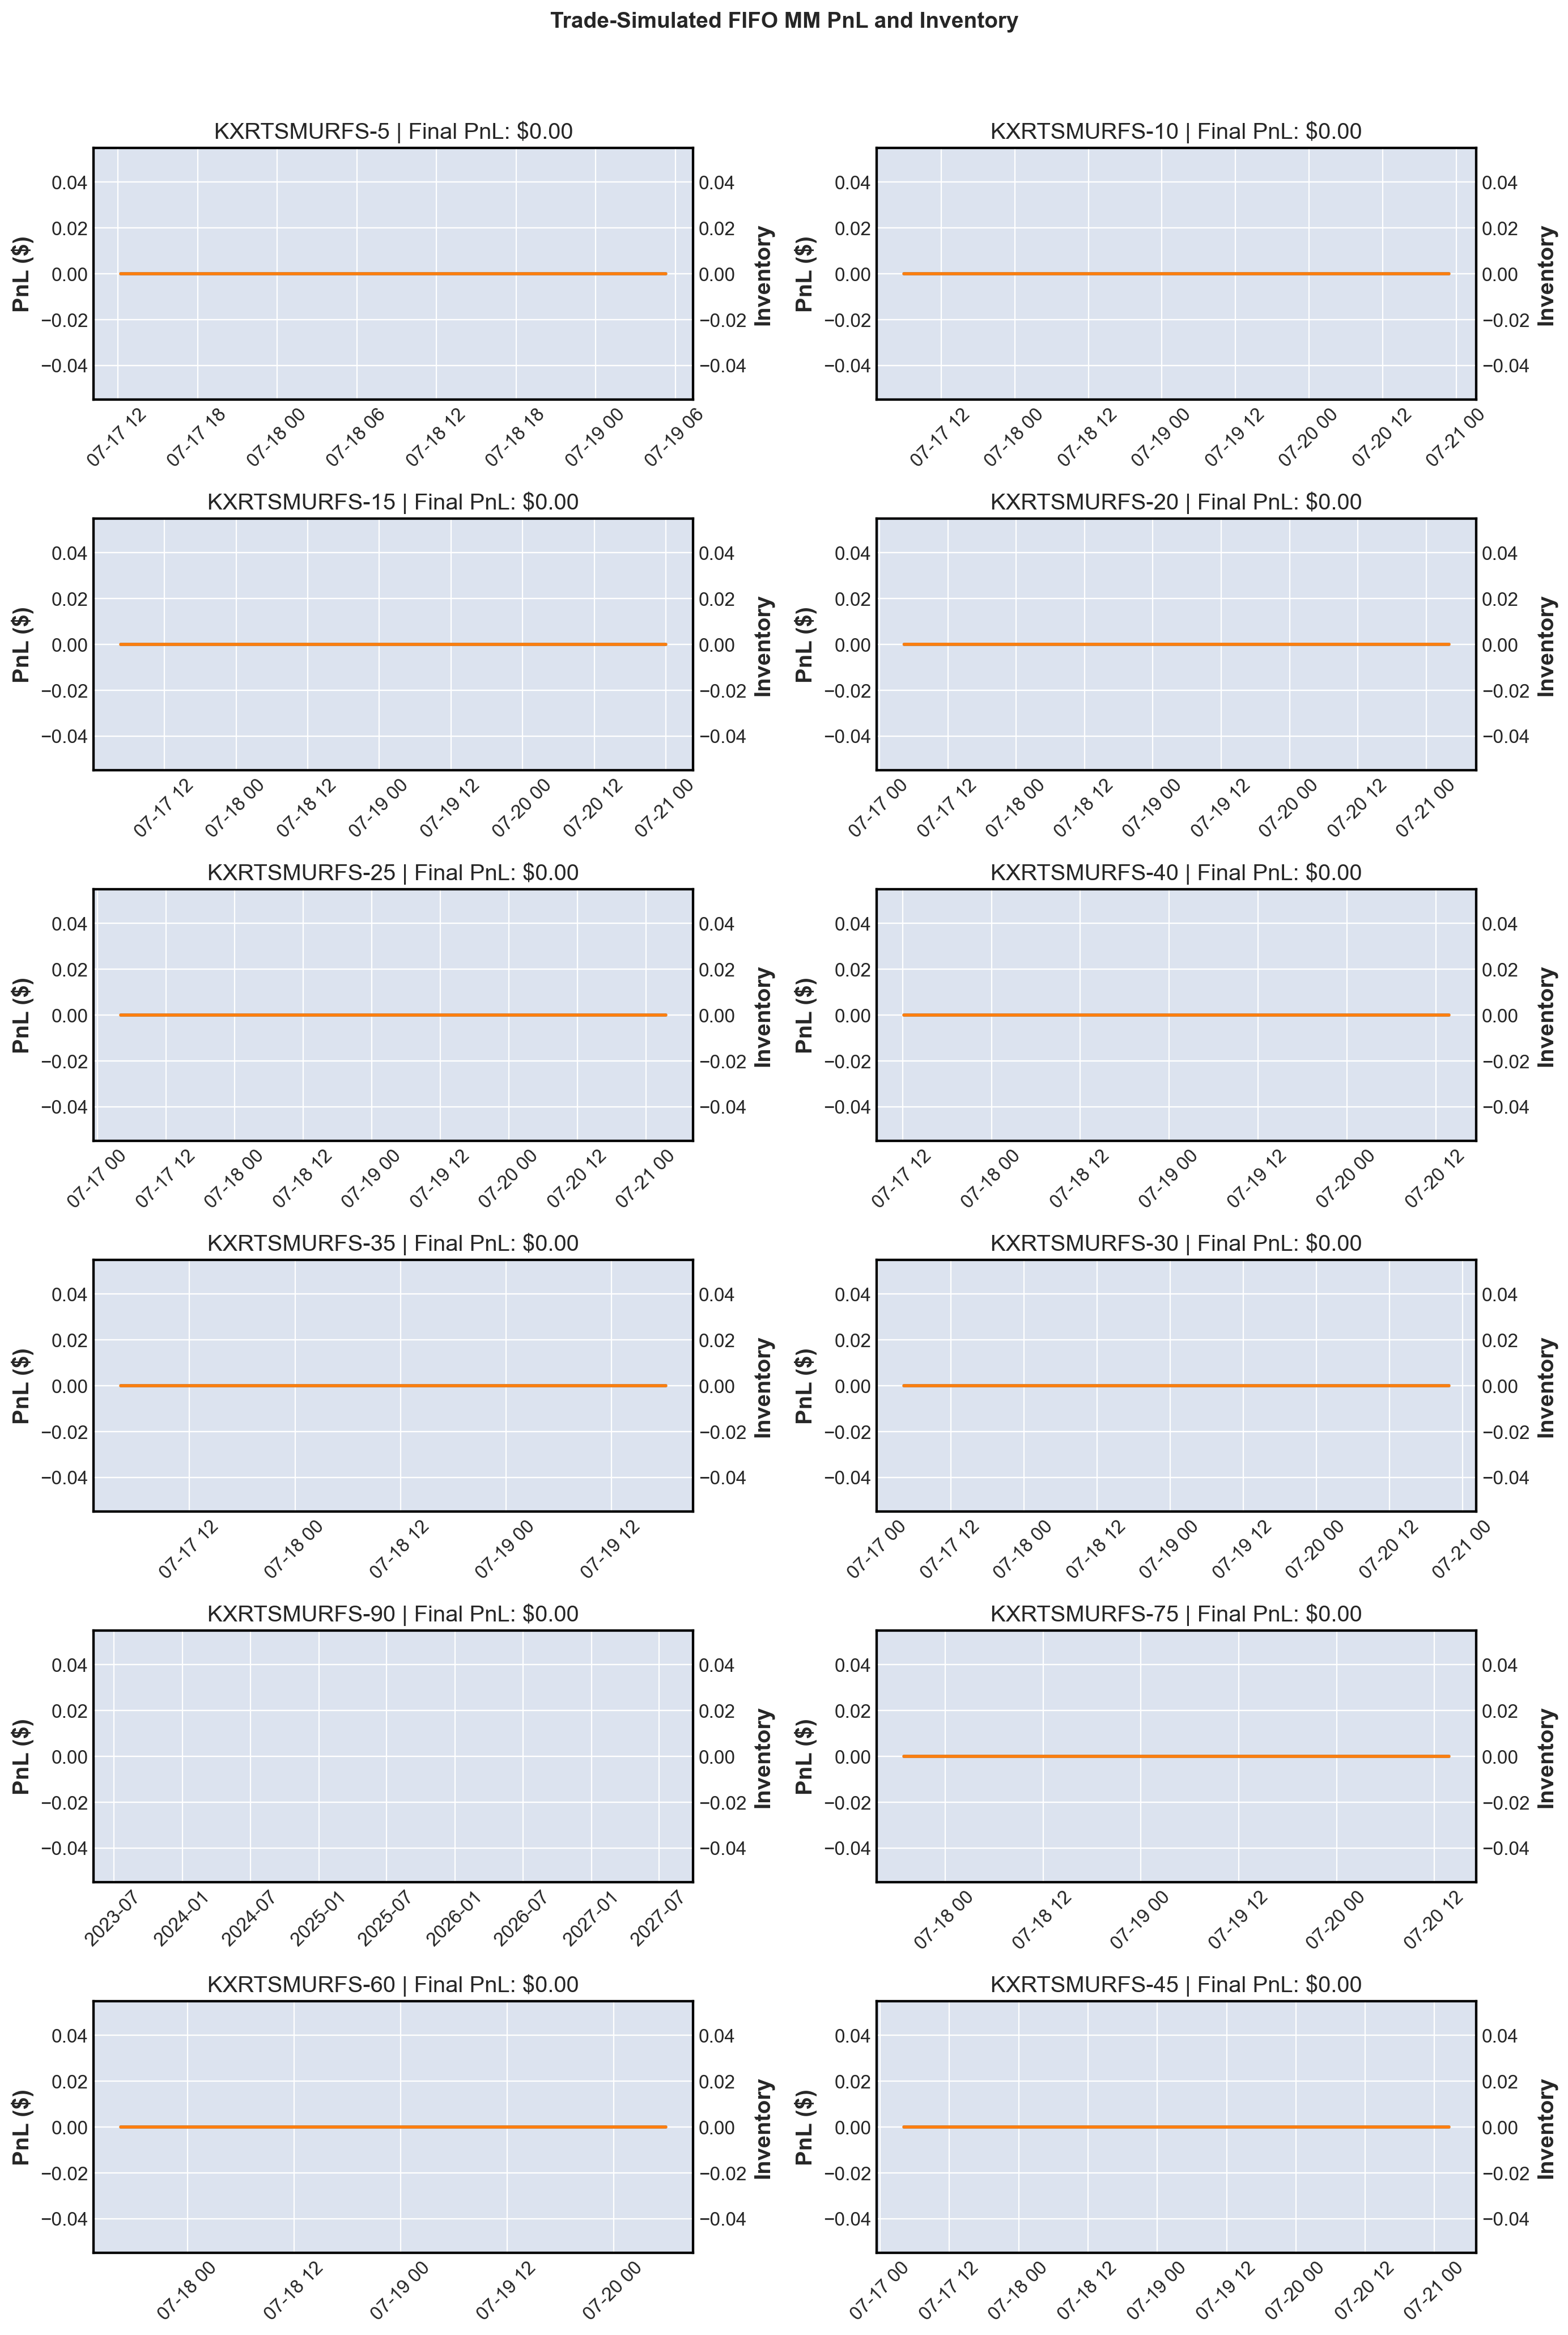

In [144]:
n = len(results)
cols = 2
rows = (n + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(14, 3.5 * rows), sharex=False)
axs = axs.flatten()

for i, (ticker, data) in enumerate(results.items()):
    ax = axs[i]
    ax2 = ax.twinx()
    ax.plot(data["timestamp"], data["pnl"], label="PnL", color="tab:blue")
    ax2.plot(data["timestamp"], data["inventory"], label="Inventory", color="tab:orange")
    ax.set_title(f"{ticker} | Final PnL: ${data['final_pnl']:.2f}")
    ax.set_ylabel("PnL ($)")
    ax2.set_ylabel("Inventory")
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle("Trade-Simulated FIFO MM PnL and Inventory", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [145]:
for tkr, r in results.items():
    print(f"{tkr:20s} Final PnL: ${r['final_pnl']:.2f}")


KXRTSMURFS-5         Final PnL: $0.00
KXRTSMURFS-10        Final PnL: $0.00
KXRTSMURFS-15        Final PnL: $0.00
KXRTSMURFS-20        Final PnL: $0.00
KXRTSMURFS-25        Final PnL: $0.00
KXRTSMURFS-40        Final PnL: $0.00
KXRTSMURFS-35        Final PnL: $0.00
KXRTSMURFS-30        Final PnL: $0.00
KXRTSMURFS-90        Final PnL: $0.00
KXRTSMURFS-75        Final PnL: $0.00
KXRTSMURFS-60        Final PnL: $0.00
KXRTSMURFS-45        Final PnL: $0.00


## 3.0 Correlation Analysis

In [13]:
weather_series = pd.json_normalize(events.get_series_list(category='Climate and Weather')['series'])
weather_titles = pd.Series(weather_series['title'].unique())
weather_titles.sort_values()
weather_series

ticker frequency                              title  \
0            KXSNOWAZ    custom                    Snow in Phoenix   
1       KXEMERGENCYLA    custom  Natural disaster hits Los Angeles   
2            KXHURNYC    custom                 Hurricane hits NYC   
3           KXRAINSEA     daily                       Seattle rain   
4        KXEARTHQUAKE    custom                         earthquake   
..                ...       ...                                ...   
90  KXNEXTCAT5HURDATE    custom          Next CAT 5 hurricane date   
91     KXEMERGENCYSTL    custom    Natural disaster hits St. Louis   
92      KXHURCOASTTEX    custom       Hurricane hits coastal Texas   
93            KXHURNO    annual         Hurricane hits New Orleans   
94      KXNEXTHURDATE    custom                Next hurricane date   

               category                             tags  \
0   Climate and Weather                             None   
1   Climate and Weather                     [Hurricanes]   
2   Climate and Weather                     [Hurricanes]   
3   Climate and Weather                             None   
4   Climate and Weather              [Natural disasters]   
..                  ...                              ...   
90  Climate and Weather                     [Hurricanes]   
91  Climate and Weather                     [Hurricanes]   
92  Climate and Weather                     [Hurricanes]   
93  Climate and Weather  [Hurricanes, Natural disasters]   
94  Climate and Weather                     [Hurricanes]   

                                   settlement_sources  \
0   [{'url': 'https://forecast.weather.gov/product...   
1   [{'url': 'https://forecast.weather.gov/product...   
2   [{'url': 'https://forecast.weather.gov/product...   
3   [{'url': 'https://w2.weather.gov/climate/index...   
4   [{'url': 'https://earthquake.usgs.gov/earthqua...   
..                                                ...   
90  [{'url': 'https://www.nhc.noaa.gov/archive/202...   
91  [{'url': 'https://forecast.weather.gov/product...   
92  [{'url': 'https://www.weather.gov/wrh/climate?...   
93  [{'url': 'https://forecast.weather.gov/product...   
94  [{'url': 'https://www.nhc.noaa.gov/archive/202...   

                                         contract_url   fee_type  \
0   https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
1   https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
2   https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
3   https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
4   https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
..                                                ...        ...   
90  https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
91  https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
92  https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
93  https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   
94  https://kalshi-public-docs.s3.us-east-1.amazon...  quadratic   

    fee_multiplier  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
90               0  
91               0  
92               0  
93               0  
94               0  

[95 rows x 9 columns]

In [14]:
weather_series_dict = {'KXHIGHUS': 'High temp in United States',
'KXHIGHAUS': 'Highest temperature in Austin',
'KXHIGHCHI': 'Highest temperature in Chicago',
'KXHIGHDEN': 'Highest temperature in Denver',
'KXHIGHHOU': 'Highest temperature in Houston',
'KXHIGHLAX': 'Highest temperature in Los Angeles',
'KXHIGHMIA': 'Highest temperature in Miami',
'KXHIGHNY': 'Highest temperature in NYC',
'KXHIGHPHIL': 'Highest temperature in Philadelphia'}

In [15]:
events.get_series(series_ticker='KXHIGHAUS')

{'series': {'ticker': 'KXHIGHAUS',
  'frequency': 'daily',
  'title': 'Highest temperature in Austin',
  'category': 'Climate and Weather',
  'tags': ['Daily temperature'],
  'settlement_sources': [{'url': 'https://forecast.weather.gov/product.php?site=EWX&product=CLI&issuedby=AUS',
    'name': 'National Weather Service'}],
  'contract_url': 'https://kalshi-public-docs.s3.us-east-1.amazonaws.com/regulatory/product-certifications/AUSHIGH.pdf',
  'fee_type': 'quadratic',
  'fee_multiplier': 1}}

In [16]:
weather_events = pd.DataFrame()

for series_ticker in weather_series_dict.keys():
    events_temp = pd.json_normalize(events.get_events(series_ticker=series_ticker)['events'])
    weather_events = pd.concat([weather_events, events_temp], ignore_index=True)

# this will pull out whatever is between "in " and " on"
weather_events['City'] = weather_events['title'].str.extract(r'in\s+(.+?)(?=\s+(?:on|today|tomorrow|yesterday)\b|[?]|$)', expand=False).str.strip()
weather_events

event_ticker series_ticker        sub_title  \
0        HIGHUS-23OCT20      KXHIGHUS  On Oct 20, 2023   
1        HIGHUS-23OCT18      KXHIGHUS  On Oct 18, 2023   
2        HIGHUS-23OCT17      KXHIGHUS  On Oct 17, 2023   
3        HIGHUS-23OCT13      KXHIGHUS  On Oct 13, 2023   
4        HIGHUS-23OCT12      KXHIGHUS  On Oct 12, 2023   
..                  ...           ...              ...   
794  KXHIGHPHIL-25APR09    KXHIGHPHIL   On Apr 9, 2025   
795  KXHIGHPHIL-25APR08    KXHIGHPHIL   On Apr 8, 2025   
796  KXHIGHPHIL-25APR07    KXHIGHPHIL   On Apr 7, 2025   
797  KXHIGHPHIL-25APR06    KXHIGHPHIL   On Apr 6, 2025   
798  KXHIGHPHIL-25APR05    KXHIGHPHIL   On Apr 5, 2025   

                                                 title collateral_return_type  \
0          High temp in United States on Oct 20, 2023?                 MECNET   
1          High temp in United States on Oct 18, 2023?                 MECNET   
2          High temp in United States on Oct 17, 2023?                 MECNET   
3          High temp in United States on Oct 13, 2023?                 MECNET   
4          High temp in United States on Oct 12, 2023?                 MECNET   
..                                                 ...                    ...   
794  Highest temperature in Philadelphia on Apr 9, ...                 MECNET   
795  Highest temperature in Philadelphia on Apr 8, ...                 MECNET   
796  Highest temperature in Philadelphia on Apr 7, ...                 MECNET   
797  Highest temperature in Philadelphia on Apr 6, ...                 MECNET   
798  Highest temperature in Philadelphia on Apr 5, ...                 MECNET   

     mutually_exclusive             category           strike_date  \
0                  True  Climate and Weather  2023-10-21T03:59:00Z   
1                  True  Climate and Weather  2023-10-19T04:04:00Z   
2                  True  Climate and Weather  2023-10-18T05:09:00Z   
3                  True  Climate and Weather  2023-10-14T03:59:00Z   
4                  True  Climate and Weather  2023-10-13T03:59:00Z   
..                  ...                  ...                   ...   
794                True  Climate and Weather                   NaN   
795                True  Climate and Weather                   NaN   
796                True  Climate and Weather                   NaN   
797                True  Climate and Weather                   NaN   
798                True  Climate and Weather                   NaN   

              City  
0    United States  
1    United States  
2    United States  
3    United States  
4    United States  
..             ...  
794   Philadelphia  
795   Philadelphia  
796   Philadelphia  
797   Philadelphia  
798   Philadelphia  

[799 rows x 9 columns]

In [17]:
weather_markets = pd.DataFrame()

for series_ticker in weather_series_dict.keys():
    events_temp = pd.json_normalize(market.get_markets(series_ticker=series_ticker)['markets'])
    weather_markets = pd.concat([weather_markets, events_temp], ignore_index=True)

weather_markets['City'] = weather_markets['yes_sub_title'].str.extract(r'in\s+(.+?)(?=\s+(?:on|today|tomorrow|yesterday)\b|[?]|$)', expand=False).str.strip()
weather_markets

ticker        event_ticker market_type  \
0         HIGHUS-23OCT20-T108      HIGHUS-23OCT20      binary   
1         HIGHUS-23OCT20-T101      HIGHUS-23OCT20      binary   
2       HIGHUS-23OCT20-B107.5      HIGHUS-23OCT20      binary   
3       HIGHUS-23OCT20-B105.5      HIGHUS-23OCT20      binary   
4       HIGHUS-23OCT20-B103.5      HIGHUS-23OCT20      binary   
..                        ...                 ...         ...   
895    KXHIGHPHIL-25JUN28-T87  KXHIGHPHIL-25JUN28      binary   
896    KXHIGHPHIL-25JUN27-T77  KXHIGHPHIL-25JUN27      binary   
897  KXHIGHPHIL-25JUN27-B76.5  KXHIGHPHIL-25JUN27      binary   
898  KXHIGHPHIL-25JUN27-B74.5  KXHIGHPHIL-25JUN27      binary   
899  KXHIGHPHIL-25JUN27-B72.5  KXHIGHPHIL-25JUN27      binary   

                                                 title       subtitle  \
0    Will the **high temp in the US** be >108° on O...  109° or above   
1    Will the **high temp in the US** be <101° on O...  100° or below   
2    Will the **high temp in the US** be 107-108° o...   107° to 108°   
3    Will the **high temp in the US** be 105-106° o...   105° to 106°   
4    Will the **high temp in the US** be 103-104° o...   103° to 104°   
..                                                 ...            ...   
895  Will the **high temp in Philadelphia** be <87°...                  
896  Will the **high temp in Philadelphia** be >77°...                  
897  Will the **high temp in Philadelphia** be 76-7...                  
898  Will the **high temp in Philadelphia** be 74-7...                  
899  Will the **high temp in Philadelphia** be 72-7...                  

     yes_sub_title           no_sub_title             open_time  \
0    109° or above  Outside 109° or above  2023-10-19T14:00:00Z   
1    100° or below  Outside 100° or below  2023-10-19T14:00:00Z   
2     107° to 108°   Outside 107° to 108°  2023-10-19T14:00:00Z   
3     105° to 106°   Outside 105° to 106°  2023-10-19T14:00:00Z   
4     103° to 104°   Outside 103° to 104°  2023-10-19T14:00:00Z   
..             ...                    ...                   ...   
895   86° or below           86° or below  2025-06-27T14:00:00Z   
896   78° or above           78° or above  2025-06-26T14:00:00Z   
897     76° to 77°             76° to 77°  2025-06-26T14:00:00Z   
898     74° to 75°             74° to 75°  2025-06-26T14:00:00Z   
899     72° to 73°             72° to 73°  2025-06-26T14:00:00Z   

               close_time expected_expiration_time  ... expiration_value  \
0    2023-10-21T03:59:00Z     2023-10-21T14:00:00Z  ...                    
1    2023-10-21T03:59:00Z     2023-10-21T14:00:00Z  ...                    
2    2023-10-21T03:59:00Z     2023-10-21T14:00:00Z  ...                    
3    2023-10-21T03:59:00Z     2023-10-21T14:00:00Z  ...                    
4    2023-10-21T03:59:00Z     2023-10-21T14:00:00Z  ...                    
..                    ...                      ...  ...              ...   
895  2025-06-29T03:59:00Z     2025-06-29T14:00:00Z  ...            88.00   
896  2025-06-28T03:59:00Z     2025-06-28T14:00:00Z  ...            72.00   
897  2025-06-28T03:59:00Z     2025-06-28T14:00:00Z  ...            72.00   
898  2025-06-28T03:59:00Z     2025-06-28T14:00:00Z  ...            72.00   
899  2025-06-28T03:59:00Z     2025-06-28T14:00:00Z  ...            72.00   

    category  risk_limit_cents strike_type floor_strike  \
0                            0     greater        108.0   
1                            0        less          NaN   
2                            0     between        107.0   
3                            0     between        105.0   
4                            0     between        103.0   
..       ...               ...         ...          ...   
895                          0        less          NaN   
896                          0     greater         77.0   
897                          0     between         76.0   
898                          0     between         74.0  

In [18]:
weather_events

event_ticker series_ticker        sub_title  \
0        HIGHUS-23OCT20      KXHIGHUS  On Oct 20, 2023   
1        HIGHUS-23OCT18      KXHIGHUS  On Oct 18, 2023   
2        HIGHUS-23OCT17      KXHIGHUS  On Oct 17, 2023   
3        HIGHUS-23OCT13      KXHIGHUS  On Oct 13, 2023   
4        HIGHUS-23OCT12      KXHIGHUS  On Oct 12, 2023   
..                  ...           ...              ...   
794  KXHIGHPHIL-25APR09    KXHIGHPHIL   On Apr 9, 2025   
795  KXHIGHPHIL-25APR08    KXHIGHPHIL   On Apr 8, 2025   
796  KXHIGHPHIL-25APR07    KXHIGHPHIL   On Apr 7, 2025   
797  KXHIGHPHIL-25APR06    KXHIGHPHIL   On Apr 6, 2025   
798  KXHIGHPHIL-25APR05    KXHIGHPHIL   On Apr 5, 2025   

                                                 title collateral_return_type  \
0          High temp in United States on Oct 20, 2023?                 MECNET   
1          High temp in United States on Oct 18, 2023?                 MECNET   
2          High temp in United States on Oct 17, 2023?                 MECNET   
3          High temp in United States on Oct 13, 2023?                 MECNET   
4          High temp in United States on Oct 12, 2023?                 MECNET   
..                                                 ...                    ...   
794  Highest temperature in Philadelphia on Apr 9, ...                 MECNET   
795  Highest temperature in Philadelphia on Apr 8, ...                 MECNET   
796  Highest temperature in Philadelphia on Apr 7, ...                 MECNET   
797  Highest temperature in Philadelphia on Apr 6, ...                 MECNET   
798  Highest temperature in Philadelphia on Apr 5, ...                 MECNET   

     mutually_exclusive             category           strike_date  \
0                  True  Climate and Weather  2023-10-21T03:59:00Z   
1                  True  Climate and Weather  2023-10-19T04:04:00Z   
2                  True  Climate and Weather  2023-10-18T05:09:00Z   
3                  True  Climate and Weather  2023-10-14T03:59:00Z   
4                  True  Climate and Weather  2023-10-13T03:59:00Z   
..                  ...                  ...                   ...   
794                True  Climate and Weather                   NaN   
795                True  Climate and Weather                   NaN   
796                True  Climate and Weather                   NaN   
797                True  Climate and Weather                   NaN   
798                True  Climate and Weather                   NaN   

              City  
0    United States  
1    United States  
2    United States  
3    United States  
4    United States  
..             ...  
794   Philadelphia  
795   Philadelphia  
796   Philadelphia  
797   Philadelphia  
798   Philadelphia  

[799 rows x 9 columns]

# 4.0 IMDB

In [146]:
import requests
from bs4 import BeautifulSoup
import re

def get_rating_distribution(title_id):
    url = f"https://www.imdb.com/title/{title_id}/ratings"
    headers = {'User-Agent': 'Mozilla/5.0'}
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    
    dist = {}
    for row in soup.select('table.imdbRatingTable tr'):
        cols = row.find_all('td')
        if len(cols) == 3:
            rating = int(cols[0].text.strip())
            count = int(cols[2].text.strip().replace(',', ''))
            dist[rating] = count
    return dist

# Example usage
dist = get_rating_distribution('tt0133093')  # The Matrix
dist

{}

In [148]:
url = f"https://www.imdb.com/title/tt0133093/ratings"
headers = {'User-Agent': 'Mozilla/5.0'}
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, 'html.parser')

dist = {}
for row in soup.select('table.imdbRatingTable tr'):
    cols = row.find_all('td')
    if len(cols) == 3:
        rating = int(cols[0].text.strip())
        count = int(cols[2].text.strip().replace(',', ''))
        dist[rating] = count
dist

{}

In [ ]:
soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1753390325428);
        }
    })</script><title>The Matrix (1999) - Ratings - IMDb</title><meta content="The Matrix (1999) - Movies, TV, Celebs, and more..." data-id="main" name="description"/><meta content="Reviews, Showtimes, DVDs, Photos, Message Boards, User Ratings, Synopsis, Trailers, Credits" name="keywo